# Background

TransJakarta is the bus rapid transit (BRT) system in Jakarta, Indonesia. Since its launch in 2004, it has grown to become one of the largest BRT systems in the world, serving millions of passengers daily. Despite its success in providing affordable and efficient public transportation, TransJakarta has faced several operational and financial challenges in recent years. With increasing competition from ride-hailing services, fluctuating passenger numbers, and rising operational costs, the need for a comprehensive data-driven strategy to enhance performance and sustainability has never been more critical.

Recently, a new CEO has been appointed to lead TransJakarta. The new CEO is determined to turn around the company's performance by leveraging data analytics to make informed decisions that will improve operational efficiency, boost passenger satisfaction, and enhance financial stability. As part of this new initiative, a team of data analysts has been hired to provide insights and recommendations based on a thorough analysis of TransJakarta's operations and financial data.

# Problem

Objective: To identify key areas for improvement in TransJakarta's operational and financial performance and provide actionable insights and recommendations to enhance overall efficiency, passenger satisfaction, and profitability.

Scope: The analysis will focus on the following areas:

* `Operational Efficiency`: Understanding peak and off-peak hours and route performance to optimize scheduling and resource allocation.
* `Revenue Analysis`: Evaluating ongoing revenue streams and identifying opportunities to boost income.
* `Cost Management`: Assessing operational costs and identifying areas for cost reduction without compromising service quality.
* `Passenger Behavior`: Analyzing passenger demographics and preferences to improve service delivery and increase ridership.

In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from IPython.display import display, IFrame
import plotly.express as px
import scipy.stats as stats
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait TransJakarta, yaitu:  

1.	transID: Unique transaction id for every transaction
2.	payCardID: Customers main identifier. The card customers use as a ticket for entrance and exit.
3.	payCardBank: Customers card bank issuer name
4.	payCardName: Customers name that is embedded in the card.
5.	payCardSex: Customers sex that is embedded in the card
6.	payCardBirthDate: Customers birth year
7.	corridorID: Corridor ID / Route ID as key for route grouping.
8.	corridorName: Corridor Name / Route Name contains Start and Finish for each route.
9.	direction: 0 for Go, 1 for Back. Direction of the route.
10.	tapInStops: Tap In (entrance) Stops ID for identifying stops name
11.	tapInStopsName: Tap In (entrance) Stops Name where customers tap in.
12.	tapInStopsLat: Latitude of Tap In Stops
13.	tapInStopsLon: Longitude of Tap In Stops
14.	stopStartSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
15.	tapInTime: Time of tap in. Date and time
16.	tapOutStops: Tap Out (Exit) Stops ID for identifying stops name
17.	tapOutStopsName: Tap out (exit) Stops Name where customers tap out.
18.	tapOutStopsLat: Latitude of Tap Out Stops
19.	tapOutStopsLon: Longitude of Tap Out Stops
20.	stopEndSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
21.	tapOutTime: Time of tap out. Date and time
22.	payAmount: The number of what customers pay. Some are free. Some not.

In [347]:
df=pd.read_csv('Transjakarta.csv')
display(df.head(),df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


## Data Understanding and Cleaning
Before diving into the analysis, we need to thoroughly understand our dataset in the data understanding phase. This process will help us identify any anomalies present in our dataset that need to be addressed during the data cleaning phase. Each anomaly handling action will be accompanied by a justification for the steps taken, whether based on domain knowledge or statistical analysis.

In [348]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-nul

In [349]:
display(df.describe(), df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [350]:
pd.set_option('display.max_colwidth', 1)
# data unique di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

In general, we can observe that:
* The Transjakarta dataset contains 22 columns and 37,900 rows.
* Several columns, namely corridorID, corridorName, tapInStops, tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, tapOutTime, and payAmount have missing data.

In [351]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

<Axes: >

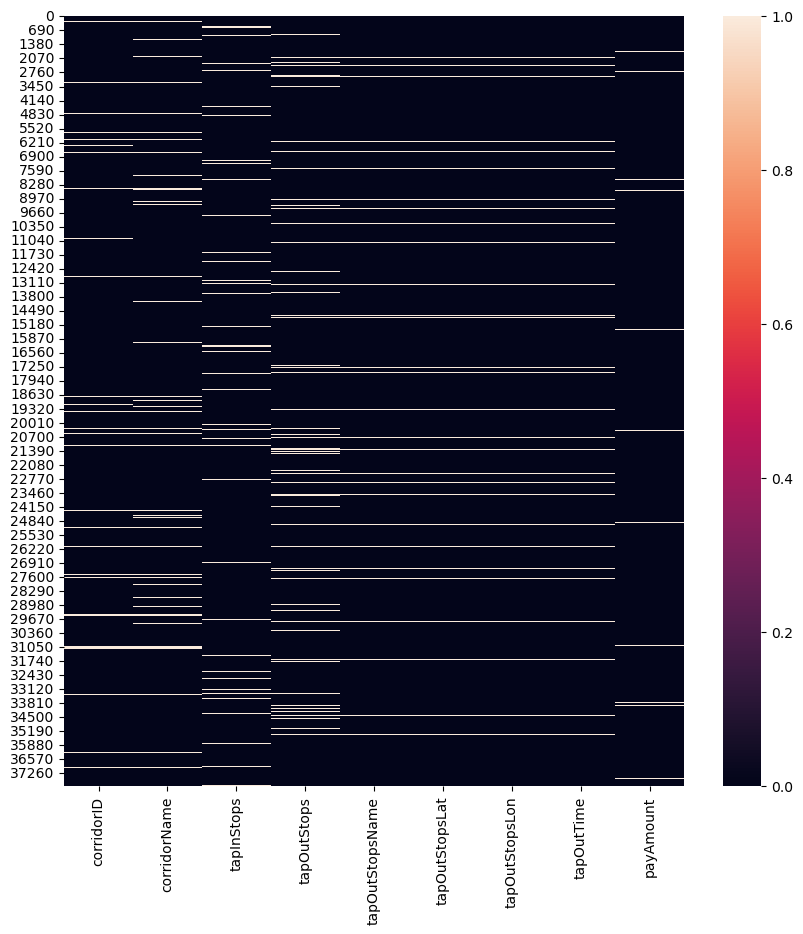

In [352]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['corridorID', 'corridorName', 'tapInStops', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat','tapOutStopsLon','tapOutTime','payAmount']].isna())

In general:
* Missing values in the columns `corridorID`, `corridorName`, `tapInStops`, `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `tapOutTime`, and `payAmount` have a proportion of approximately 0-6%.

There are two ways to handle missing values:

* First, filling in the missing data. This method is preferred. There are several methods to fill in missing values, the best approach is to fill in the missing data with the actual value, or as close as possible to the original value. In this case, we will try to fill in the missing values based on other columns related to the columns with missing values.
    * There are 4 correlations between columns, namely:
    1. payCardID - payCardBank - payCardName - payCardSex - payCardBirthDate
    2. corridorID - corridorName - payAmount
    3. tapInStops - tapInStopsName - tapInStopsLat - tapInStopsLon
    4. tapOutStops - tapOutStopsName - tapOutStopsLat - tapOutStopsLon

* Second, deleting rows/columns that contain missing values.

Therefore, the whole Data Cleaning process will look like this:
1. Identify Missing Values:
    Identify which columns have missing values.

2. Convert Data types:
    Identify which data types are not appropriate, and update them

3. Create Mapping Dictionaries:
    Create dictionaries to map the correlated values based on existing data.

4. Fill in missing dictionary keys:
    Fill in missing corridorID, tapInStops, and tapOutStops based on corridorName, tapInStopsName, and tapOutStopsName.

5. Update the mapping dictionary:
    The new dictionary should have missing values in corridorID, tapInStops, and tapOutStops columns filled in. 

6. Impute Missing Values Using the Updated Mappings:
    Use the mappings to fill in the missing values.

7. Drop updated rows with remaining missing values:
    Use the updated rows in the data, and drop the remaining rows with missing values.

**1. Cleaning - Identify Missing Values**

transID             0   
payCardID           0   
payCardBank         0   
payCardName         0   
payCardSex          0   
payCardBirthDate    0   
corridorID          1257
corridorName        1930
direction           0   
tapInStops          1213
tapInStopsName      0   
tapInStopsLat       0   
tapInStopsLon       0   
stopStartSeq        0   
tapInTime           0   
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64


<Axes: >

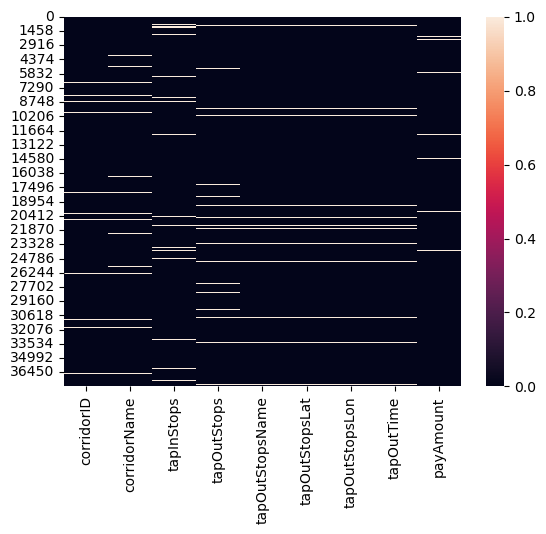

In [353]:
# jumlah missing value di kolom
print(df.isna().sum())
sns.heatmap(df[['corridorID', 'corridorName', 'tapInStops', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat','tapOutStopsLon','tapOutTime','payAmount']].isna())

There are 1,257 missing data in column `corridorID`, 1,930 in column `corridorName`, 1,213 in column `tapInStops`, 2,289 in column `tapOutStops`, 1,344 in column `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime`, and 1,007 in column `payAmount`.   

**2. Cleaning - Convert Datatypes**

In [354]:
# Convert data types
df['transID'] = df['transID'].astype('string')
df['payCardID'] = df['payCardID'].astype('string')
df['payCardBank'] = df['payCardBank'].astype('string')
df['payCardName'] = df['payCardName'].astype('string')
df['payCardSex'] = df['payCardSex'].astype('string')
df['payCardBirthDate'] = df['payCardBirthDate'].astype('int64')
df['corridorID'] = df['corridorID'].astype('string')
df['corridorName'] = df['corridorName'].astype('string')
df['direction'] = df['direction'].astype('int64')
df['tapInStops'] = df['tapInStops'].astype('string')
df['tapInStopsName'] = df['tapInStopsName'].astype('string')
df['tapInStopsLat'] = df['tapInStopsLat'].astype('float64')
df['tapInStopsLon'] = df['tapInStopsLon'].astype('float64')
df['stopStartSeq'] = df['stopStartSeq'].astype('int64')
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])
df['tapOutStops'] = df['tapOutStops'].astype('string')
df['tapOutStopsName'] = df['tapOutStopsName'].astype('string')
df['tapOutStopsLat'] = df['tapOutStopsLat'].astype('float64')
df['tapOutStopsLon'] = df['tapOutStopsLon'].astype('float64')

# Verify data types
print(df.dtypes)

transID             string[python]
payCardID           string[python]
payCardBank         string[python]
payCardName         string[python]
payCardSex          string[python]
payCardBirthDate    int64         
corridorID          string[python]
corridorName        string[python]
direction           int64         
tapInStops          string[python]
tapInStopsName      string[python]
tapInStopsLat       float64       
tapInStopsLon       float64       
stopStartSeq        int64         
tapInTime           datetime64[ns]
tapOutStops         string[python]
tapOutStopsName     string[python]
tapOutStopsLat      float64       
tapOutStopsLon      float64       
stopEndSeq          float64       
tapOutTime          datetime64[ns]
payAmount           float64       
dtype: object


**3. Cleaning - Create Mapping Dictionaries**

In [355]:
# Correlation 1 is not needed since there is no missing values with regard to this

# Correlation 2: corridorID - corridorName - payAmount
corridor_mapping = df.dropna(subset=['corridorID', 'corridorName', 'payAmount']).drop_duplicates(subset=['corridorName'])[['corridorID', 'corridorName', 'payAmount']]
corridor_mapping.set_index('corridorName', inplace=True)
corridor_dict = corridor_mapping.to_dict('index')

# Correlation 3: tapInStops - tapInStopsName - tapInStopsLat - tapInStopsLon
tapIn_mapping = df.dropna(subset=['tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon']).drop_duplicates(subset=['tapInStopsName'])[['tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon']]
tapIn_mapping.set_index('tapInStopsName', inplace=True)
tapIn_dict = tapIn_mapping.to_dict('index')

# Correlation 4: tapOutStops - tapOutStopsName - tapOutStopsLat - tapOutStopsLon
tapOut_mapping = df.dropna(subset=['tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon']).drop_duplicates(subset=['tapOutStopsName'])[['tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon']]
tapOut_mapping.set_index('tapOutStopsName', inplace=True)
tapOut_dict = tapOut_mapping.to_dict('index')

# Display the initial mapping dictionaries
print("Initial Corridor Mapping Dictionary:")
print(corridor_dict)
print("\nInitial TapIn Mapping Dictionary:")
print(tapIn_dict)
print("\nInitial TapOut Mapping Dictionary:")
print(tapOut_dict)

Initial Corridor Mapping Dictionary:
{'Matraman Baru - Ancol': {'corridorID': '5', 'payAmount': 3500.0}, 'Stasiun Tebet - Karet via Patra Kuningan': {'corridorID': '6C', 'payAmount': 3500.0}, 'Pantai Maju - Kota': {'corridorID': 'R1A', 'payAmount': 3500.0}, 'Pulo Gebang - Pulo Gadung 2 via PIK': {'corridorID': '11D', 'payAmount': 3500.0}, 'Tanjung Priok - Pluit': {'corridorID': '12', 'payAmount': 3500.0}, 'Cibubur - Balai Kota': {'corridorID': '1T', 'payAmount': 20000.0}, 'Kalibata - Kuningan': {'corridorID': 'JAK.18', 'payAmount': 0.0}, 'Bekasi Barat - Kuningan': {'corridorID': 'B14', 'payAmount': 20000.0}, 'Rempoa - Blok M': {'corridorID': '1Q', 'payAmount': 3500.0}, 'Kampung Melayu - Tanah Abang via Cikini': {'corridorID': '5M', 'payAmount': 3500.0}, 'PGC 2 - Grogol 2': {'corridorID': '9A', 'payAmount': 3500.0}, 'Pulo Gadung 2 - Tosari': {'corridorID': '4', 'payAmount': 3500.0}, 'Pasar Minggu - Jagakarsa': {'corridorID': 'JAK.46', 'payAmount': 0.0}, 'Ciputat - Kampung Rambutan': {'c

**4. Cleaning - Filling in Missing Dictionary Keys**

In [356]:
# Function to fill missing values for corridorID based on corridorName
def fill_corridor_id(row):
    if pd.isnull(row['corridorID']) and pd.notnull(row['corridorName']):
        if row['corridorName'] in corridor_dict:
            row['corridorID'] = corridor_dict[row['corridorName']]['corridorID']
    return row

# Function to fill missing values for tapInStops based on tapInStopsName and tapOutStopsName
def fill_tap_in_stops(row):
    if pd.isnull(row['tapInStops']) and pd.notnull(row['tapInStopsName']):
        if row['tapInStopsName'] in tapIn_dict:
            row['tapInStops'] = tapIn_dict[row['tapInStopsName']]['tapInStops']
        if row['tapInStopsName'] in tapOut_dict:
            row['tapInStops'] = tapOut_dict[row['tapInStopsName']]['tapOutStops']
    return row

# Function to fill missing values for tapOutStops based on tapOutStopsName and tapInStopsName
def fill_tap_out_stops(row):
    if pd.isnull(row['tapOutStops']) and pd.notnull(row['tapOutStopsName']):
        if row['tapOutStopsName'] in tapOut_dict:
            row['tapOutStops'] = tapOut_dict[row['tapOutStopsName']]['tapOutStops']
        if row['tapOutStopsName'] in tapIn_dict:
            row['tapOutStops'] = tapIn_dict[row['tapOutStopsName']]['tapInStops']
    return row

# Apply the functions to fill missing corridorID, tapInStops, and tapOutStops
df = df.apply(fill_corridor_id, axis=1)
df = df.apply(fill_tap_in_stops, axis=1)
df = df.apply(fill_tap_out_stops, axis=1)


**5. Cleaning - Update Mapping Dictionaries**

In [357]:
# Update the mapping dictionaries with filled values, and corridorID, tapInStops, and tapOutStops acting as dictionary keys now
corridor_mapping = df.dropna(subset=['corridorID', 'corridorName', 'payAmount']).drop_duplicates(subset=['corridorID'])[['corridorID', 'corridorName', 'payAmount']]
corridor_mapping.set_index('corridorID', inplace=True)
corridor_dict = corridor_mapping.to_dict('index')

tapIn_mapping = df.dropna(subset=['tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon']).drop_duplicates(subset=['tapInStops'])[['tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon']]
tapIn_mapping.set_index('tapInStops', inplace=True)
tapIn_dict = tapIn_mapping.to_dict('index')

tapOut_mapping = df.dropna(subset=['tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon']).drop_duplicates(subset=['tapOutStops'])[['tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon']]
tapOut_mapping.set_index('tapOutStops', inplace=True)
tapOut_dict = tapOut_mapping.to_dict('index')

# Display the updated mapping dictionaries
print("\nUpdated Corridor Mapping Dictionary:")
print(corridor_dict)
print("\nUpdated TapIn Mapping Dictionary:")
print(tapIn_dict)
print("\nUpdated TapOut Mapping Dictionary:")
print(tapOut_dict)


Updated Corridor Mapping Dictionary:
{'5': {'corridorName': 'Matraman Baru - Ancol', 'payAmount': 3500.0}, '6C': {'corridorName': 'Stasiun Tebet - Karet via Patra Kuningan', 'payAmount': 3500.0}, 'R1A': {'corridorName': 'Pantai Maju - Kota', 'payAmount': 3500.0}, '11D': {'corridorName': 'Pulo Gebang - Pulo Gadung 2 via PIK', 'payAmount': 3500.0}, '12': {'corridorName': 'Tanjung Priok - Pluit', 'payAmount': 3500.0}, '1T': {'corridorName': 'Cibubur - Balai Kota', 'payAmount': 20000.0}, 'JAK.18': {'corridorName': 'Kalibata - Kuningan', 'payAmount': 0.0}, 'B14': {'corridorName': 'Bekasi Barat - Kuningan', 'payAmount': 20000.0}, '1Q': {'corridorName': 'Rempoa - Blok M', 'payAmount': 3500.0}, '5M': {'corridorName': 'Kampung Melayu - Tanah Abang via Cikini', 'payAmount': 3500.0}, '9A': {'corridorName': 'PGC 2 - Grogol 2', 'payAmount': 3500.0}, '4': {'corridorName': 'Pulo Gadung 2 - Tosari', 'payAmount': 3500.0}, 'JAK.46': {'corridorName': 'Pasar Minggu - Jagakarsa', 'payAmount': 0.0}, 'S22':

**6. Cleaning - Update All Missing Values Based on Mapping Dictionaries**

In [358]:
# Function to fill missing values and update dictionary for corridorID
def fill_corridor(row):
    if pd.notnull(row['corridorID']):
        # If the corridorID is not already in the corridor_dict dictionary, it adds an entry for this corridorID with its corridorName and payAmount.
        if row['corridorID'] not in corridor_dict:
            corridor_dict[row['corridorID']] = {
                'corridorName': row['corridorName'],
                'payAmount': row['payAmount']
            }
        # If corridorName is empty
        if pd.isnull(row['corridorName']):
            row['corridorName'] = corridor_dict[row['corridorID']]['corridorName']
        # If payAmount is empty
        if pd.isnull(row['payAmount']):
            row['payAmount'] = corridor_dict[row['corridorID']]['payAmount']
    return row

# Function to fill missing values and update dictionary for tapInStops
def fill_tap_in(row):
    if pd.notnull(row['tapInStops']):
        if row['tapInStops'] not in tapIn_dict:
            tapIn_dict[row['tapInStops']] = {
                'tapInStopsName': row['tapInStopsName'],
                'tapInStopsLat': row['tapInStopsLat'],
                'tapInStopsLon': row['tapInStopsLon']
            }
        if pd.isnull(row['tapInStopsName']):
            row['tapInStopsName'] = tapIn_dict[row['tapInStops']]['tapInStopsName']
        if pd.isnull(row['tapInStopsLat']):
            row['tapInStopsLat'] = tapIn_dict[row['tapInStops']]['tapInStopsLat']
        if pd.isnull(row['tapInStopsLon']):
            row['tapInStopsLon'] = tapIn_dict[row['tapInStops']]['tapInStopsLon']
    # Use tapOut_dict if tapInStops details are still missing
    if pd.isnull(row['tapInStopsName']) and row['tapInStops'] in tapOut_dict:
        row['tapInStopsName'] = tapOut_dict[row['tapInStops']]['tapOutStopsName']
    if pd.isnull(row['tapInStopsLat']) and row['tapInStops'] in tapOut_dict:
        row['tapInStopsLat'] = tapOut_dict[row['tapInStops']]['tapOutStopsLat']
    if pd.isnull(row['tapInStopsLon']) and row['tapInStops'] in tapOut_dict:
        row['tapInStopsLon'] = tapOut_dict[row['tapInStops']]['tapOutStopsLon']
    return row

# Function to fill missing values and update dictionary for tapOutStops
def fill_tap_out(row):
    if pd.notnull(row['tapOutStops']):
        if row['tapOutStops'] not in tapOut_dict:
            tapOut_dict[row['tapOutStops']] = {
                'tapOutStopsName': row['tapOutStopsName'],
                'tapOutStopsLat': row['tapOutStopsLat'],
                'tapOutStopsLon': row['tapOutStopsLon']
            }
        if pd.isnull(row['tapOutStopsName']):
            row['tapOutStopsName'] = tapOut_dict[row['tapOutStops']]['tapOutStopsName']
        if pd.isnull(row['tapOutStopsLat']):
            row['tapOutStopsLat'] = tapOut_dict[row['tapOutStops']]['tapOutStopsLat']
        if pd.isnull(row['tapOutStopsLon']):
            row['tapOutStopsLon'] = tapOut_dict[row['tapOutStops']]['tapOutStopsLon']
    # Use tapIn_dict if tapOutStops details are still missing
    if pd.isnull(row['tapOutStopsName']) and row['tapOutStops'] in tapIn_dict:
        row['tapOutStopsName'] = tapIn_dict[row['tapOutStops']]['tapInStopsName']
    if pd.isnull(row['tapOutStopsLat']) and row['tapOutStops'] in tapIn_dict:
        row['tapOutStopsLat'] = tapIn_dict[row['tapOutStops']]['tapInStopsLat']
    if pd.isnull(row['tapOutStopsLon']) and row['tapOutStops'] in tapIn_dict:
        row['tapOutStopsLon'] = tapIn_dict[row['tapOutStops']]['tapInStopsLon']
    return row

# Apply the functions to fill missing values and update dictionaries
df = df.apply(fill_corridor, axis=1)
df = df.apply(fill_tap_in, axis=1)
df = df.apply(fill_tap_out, axis=1)

**7. Cleaning - Drop remaining Missing Values**

In [359]:
# Drop the remaining updated rows with missing values
df_cleaned = df.dropna()

In [360]:
listItem = []
for col in df_cleaned.columns :
    listItem.append([col, df_cleaned[col].dtype, df_cleaned[col].isna().sum(),
                    df_cleaned[col].nunique(), list(df_cleaned[col].drop_duplicates().sample(2).values)]);

df_cleanedDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df_cleaned.shape)
df_cleanedDesc

(34506, 22)


,dataFeatures,dataType,null,unique,uniqueSample
0,transID,object,0,34506,"[NNTE801V8D12YY, UQML477S0Z36MG]"
1,payCardID,object,0,1942,"[3589380857722689, 4256817668191]"
2,payCardBank,object,0,6,"[bni, brizzi]"
3,payCardName,object,0,1935,"[Estiono Budiman, Betania Iswahyudi]"
4,payCardSex,object,0,2,"[F, M]"
5,payCardBirthDate,int64,0,66,"[1984, 2004]"
6,corridorID,object,0,216,"[JAK.08, JAK.43B]"
7,corridorName,object,0,211,"[Cibubur Junction - Blok M, Blok M - Kota]"
8,direction,int64,0,2,"[1, 0]"
9,tapInStops,object,0,2483,"[P00080, B06762P]"


In [361]:
df_cleaned.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

Before cleaning, we had 37,900 rows of data. Now, we have 34,488 rows. Approximately 3,412 rows of empty data were deleted, and the remaining missing data were filled with relevant values.

# Data Analysis
We have completed the data cleaning stage. Now, we can begin data analysis to assist the newly appointed CEO of Transjakarta in solving the aforementioned problems.

* Key Areas of Analysis for Revenue, Costing, Operational, and Customer Demographics
    - Peak Hours & Demand Management 
    - Routes & Corridor Efficiency
    - Tap-In & Tap-Out Stops Analysis
    - Customer Demographics & Usage Pattern 

**Peak Hours & Demand Management**

tapInHour
5     2856
6     5132
7     2357
8     2405
9     2370
10    95  
11    126 
12    106 
13    120 
14    7   
15    137 
16    2862
17    4785
18    2000
19    2003
20    1977
21    1820
Name: count, dtype: int64


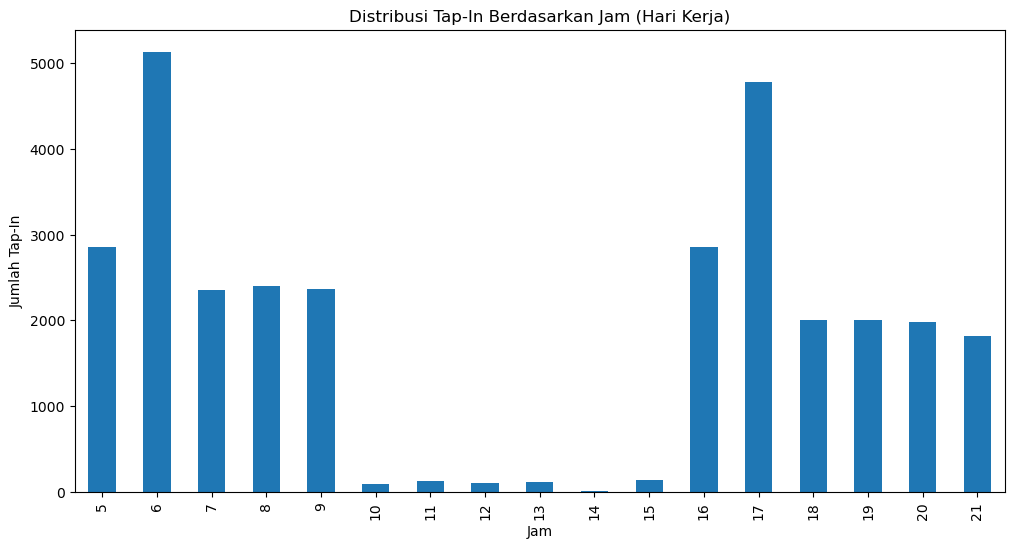

tapInHour
5     207
6     184
7     188
8     218
9     188
10    180
11    185
12    198
13    207
14    153
15    219
16    203
17    246
18    194
19    215
20    224
21    139
Name: count, dtype: int64


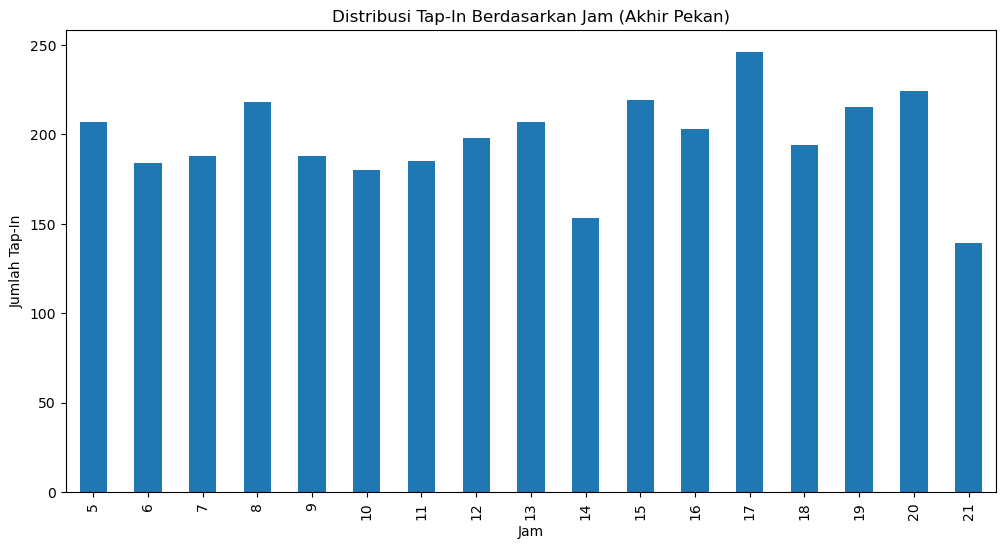

In [362]:
# Menambahkan kolom untuk hari dalam minggu dan jam tap-in
df_cleaned['day_of_week'] = df_cleaned['tapInTime'].dt.dayofweek
df_cleaned['tapInHour'] = df_cleaned['tapInTime'].dt.hour

# Memisahkan data untuk hari kerja dan akhir pekan
weekday_data = df_cleaned[df_cleaned['day_of_week'] < 5]  # Senin-Jumat
weekend_data = df_cleaned[df_cleaned['day_of_week'] >= 5]  # Sabtu-Minggu

# Menampilkan distribusi jumlah tap-in berdasarkan jam untuk hari kerja
peak_hours_weekday = weekday_data['tapInHour'].value_counts().sort_index()
print(peak_hours_weekday)
plt.figure(figsize=(12, 6))
peak_hours_weekday.plot(kind='bar', title='Distribusi Tap-In Berdasarkan Jam (Hari Kerja)')
plt.xlabel('Jam')
plt.ylabel('Jumlah Tap-In')
plt.show()

# Menampilkan distribusi jumlah tap-in berdasarkan jam untuk akhir pekan
peak_hours_weekend = weekend_data['tapInHour'].value_counts().sort_index()
print(peak_hours_weekend)
plt.figure(figsize=(12, 6))
peak_hours_weekend.plot(kind='bar', title='Distribusi Tap-In Berdasarkan Jam (Akhir Pekan)')
plt.xlabel('Jam')
plt.ylabel('Jumlah Tap-In')
plt.show()

**Observations:**

Weekday Peak Hours:
The first chart illustrates the distribution of tap-in counts by hour during weekdays (Monday to Friday). 
From this analysis, we can observe the following key points:

* Morning Peak: There is a significant increase in tap-in counts during the early morning hours, particularly around 5 AM to 9 AM. This indicates a high volume of passengers commuting to work or school.

* Evening Peak: Another noticeable peak occurs in the late afternoon and evening hours, specifically from 4 PM to 9 PM, reflecting the rush of passengers returning home from work or school.

Weekend Peak Hours:
The second chart shows the distribution of tap-in counts by hour during weekends (Saturday and Sunday). The patterns observed are slightly different from weekdays:

* Late Morning to Early Afternoon: There is a gradual increase in tap-in counts. This may suggest a later start for most passengers compared to weekdays, likely due to leisure activities or errands.

* Consistent Activity in the Afternoon: Unlike weekdays, the evening peak is less pronounced, with relatively consistent tap-in activity throughout the afternoon and early evening hours.

         date  payAmount
0  2023-04-01  48000.0  
1  2023-04-02  17500.0  
2  2023-04-03  3962000.0
3  2023-04-04  4042000.0
4  2023-04-05  3963500.0


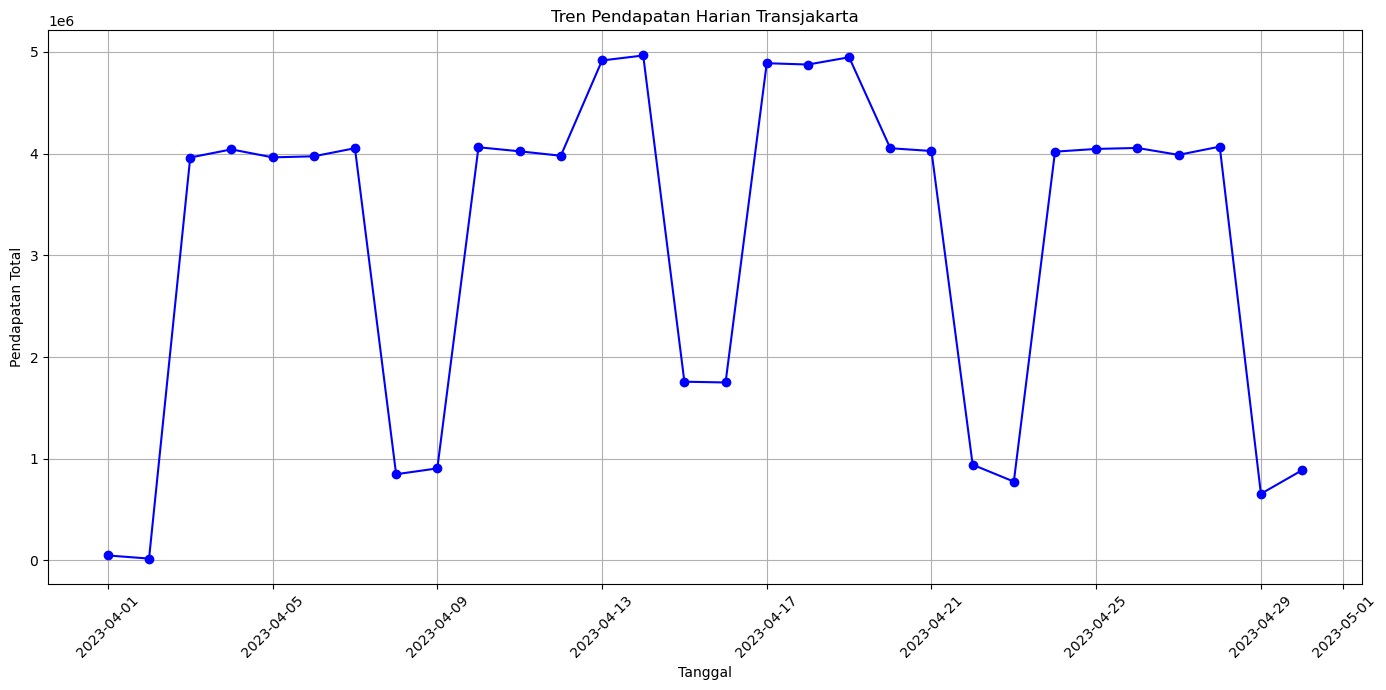

  day_of_week   payAmount
0  Monday      16934000.0
1  Tuesday     16988000.0
2  Wednesday   16947000.0
3  Thursday    16932000.0
4  Friday      17114000.0
5  Saturday    4247000.0 
6  Sunday      4332500.0 


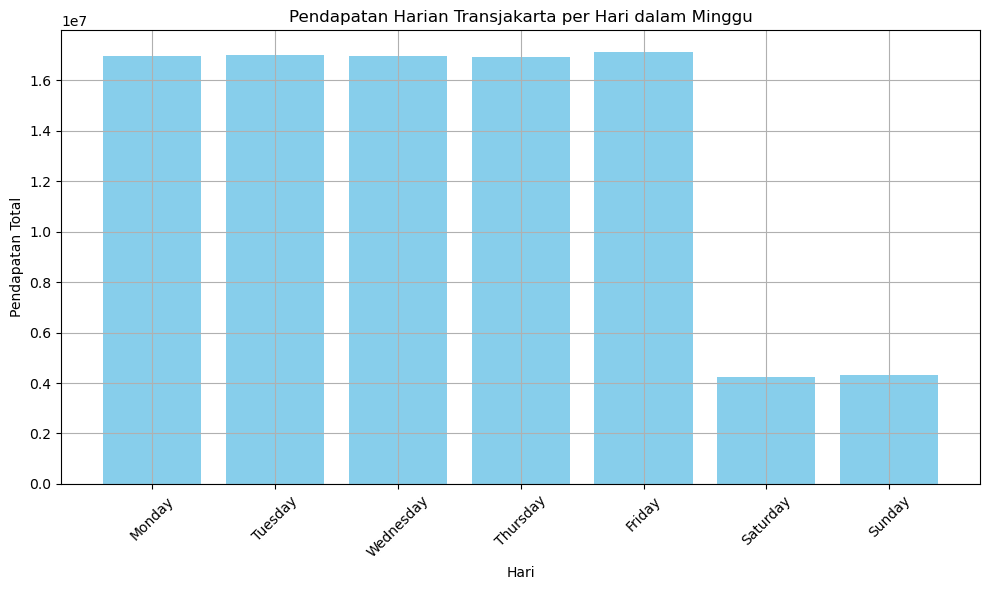

         date  num_trips
0  2023-04-01  14       
1  2023-04-02  7        
2  2023-04-03  1456     
3  2023-04-04  1483     
4  2023-04-05  1455     


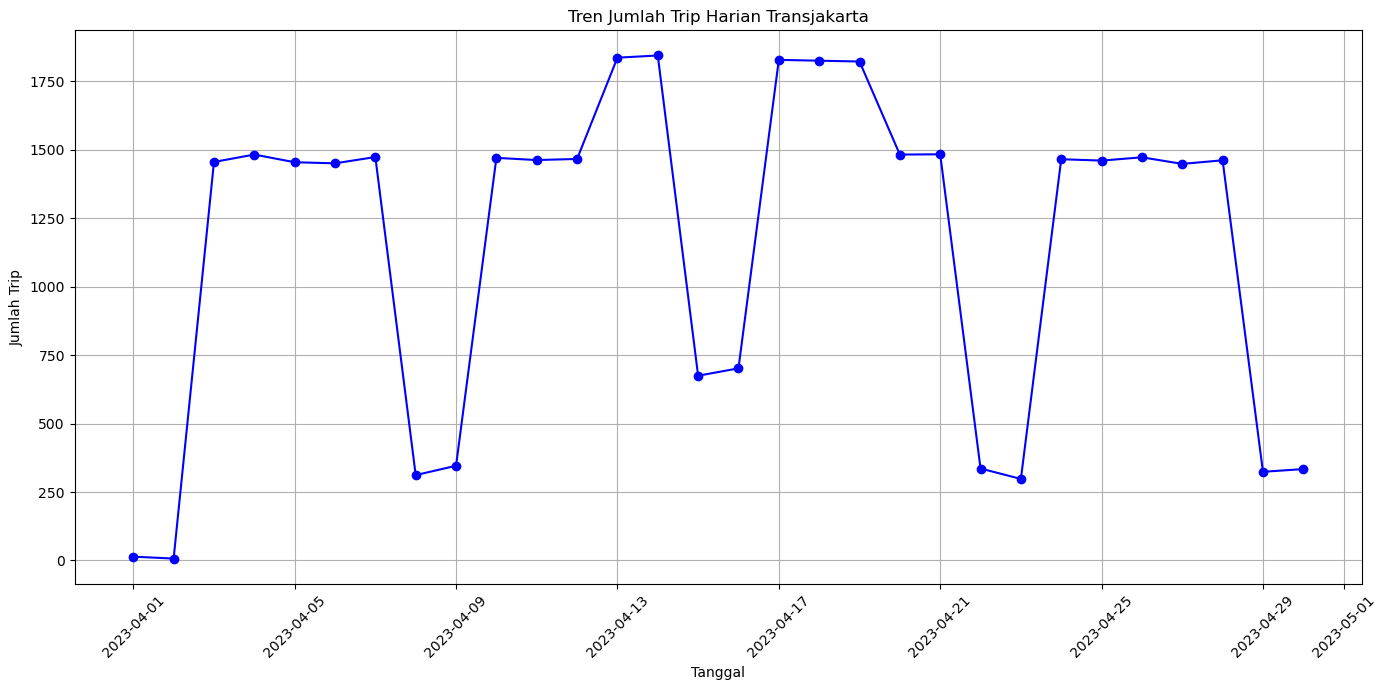

  day_of_week  num_trips
0  Monday      6222     
1  Tuesday     6233     
2  Wednesday   6218     
3  Thursday    6220     
4  Friday      6265     
5  Saturday    1661     
6  Sunday      1687     


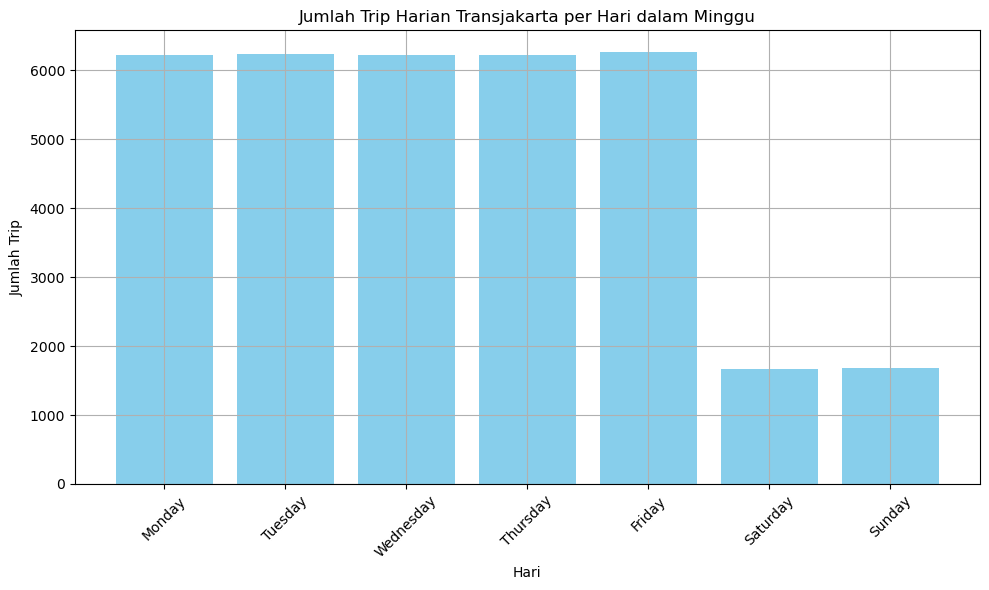

In [363]:
# Menambahkan kolom tanggal saja dari tapInTime
df_cleaned['date'] = df_cleaned['tapInTime'].dt.date

# Menghitung total pendapatan harian
daily_revenue = df_cleaned.groupby('date')['payAmount'].sum().reset_index()

# Debug: Print daily revenue head
print(daily_revenue.head())

# Menampilkan tren pendapatan harian
plt.figure(figsize=(14, 7))
plt.plot(daily_revenue['date'], daily_revenue['payAmount'], marker='o', linestyle='-', color='b')
plt.title('Tren Pendapatan Harian Transjakarta')
plt.xlabel('Tanggal')
plt.ylabel('Pendapatan Total')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Menambahkan kolom hari dalam minggu
df_cleaned['day_of_week'] = df_cleaned['tapInTime'].dt.day_name()

# Menghitung total pendapatan per hari dalam minggu
weekly_revenue = df_cleaned.groupby('day_of_week')['payAmount'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

# Debug: Print weekly revenue
print(weekly_revenue)

# Menampilkan tren pendapatan per hari dalam minggu
plt.figure(figsize=(10, 6))
plt.bar(weekly_revenue['day_of_week'], weekly_revenue['payAmount'], color='skyblue')
plt.title('Pendapatan Harian Transjakarta per Hari dalam Minggu')
plt.xlabel('Hari')
plt.ylabel('Pendapatan Total')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Menghitung jumlah trip harian
daily_trips = df_cleaned.groupby('date').size().reset_index(name='num_trips')

# Debug: Print daily trips head
print(daily_trips.head())

# Menampilkan tren jumlah trip harian
plt.figure(figsize=(14, 7))
plt.plot(daily_trips['date'], daily_trips['num_trips'], marker='o', linestyle='-', color='b')
plt.title('Tren Jumlah Trip Harian Transjakarta')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Trip')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Menghitung jumlah trip per hari dalam minggu
weekly_trips = df_cleaned.groupby('day_of_week').size().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index(name='num_trips')

# Debug: Print weekly trips
print(weekly_trips)

# Menampilkan jumlah trip per hari dalam minggu
plt.figure(figsize=(10, 6))
plt.bar(weekly_trips['day_of_week'], weekly_trips['num_trips'], color='skyblue')
plt.title('Jumlah Trip Harian Transjakarta per Hari dalam Minggu')
plt.xlabel('Hari')
plt.ylabel('Jumlah Trip')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observations:**

Daily Revenue Trend:
The first chart shows the daily revenue trend for TransJakarta. 
From this analysis, we can observe the following key points:
* Revenue Fluctuations: There are noticeable fluctuations in daily revenue, which may indicate variations in passenger numbers or changes in fare collections.
* Identifiable Peaks: Certain days exhibit significant peaks in revenue, possibly correlating with specific events, holidays, or promotions.

Weekly Revenue Trend:
The second chart illustrates the total revenue generated on each day of the week.
* Weekday Dominance: Revenue is generally higher on weekdays (Monday to Friday) compared to weekends. This suggests that most passengers use TransJakarta services for commuting to work or school during the week.
* Lower Weekend Revenue: Revenue tends to drop on weekends (Saturday and Sunday), indicating lower passenger numbers during these days.

Daily Trip Trend:
The third chart displays the trend in the number of daily trips.
* Consistent Usage: The number of trips follows a similar fluctuation pattern as the daily revenue, confirming that passenger numbers significantly influence revenue trends.
* High-Activity Periods: Certain periods exhibit a higher number of trips, likely coinciding with the beginning and end of the workweek.

Weekly Trip Distribution:
The fourth chart shows the distribution of the number of trips across the days of the week.
* Weekday Peak: The number of trips is highest on weekdays, particularly from Monday to Friday, aligning with the revenue trend.
* Weekend Drop: A noticeable drop in trips is observed during the weekends, mirroring the revenue decrease.

In [364]:
# Menambahkan kolom untuk memisahkan weekday dan weekend
df_cleaned['is_weekend'] = df_cleaned['day_of_week'].isin(['Saturday', 'Sunday'])

# Menghitung total pendapatan harian
daily_revenue = df_cleaned.groupby(['date', 'is_weekend'])['payAmount'].sum().reset_index()

# Memisahkan data weekday dan weekend
weekday_revenue = daily_revenue[daily_revenue['is_weekend'] == False]['payAmount']
weekend_revenue = daily_revenue[daily_revenue['is_weekend'] == True]['payAmount']

# Melakukan uji t (t-test) untuk dua sampel independen
t_stat, p_value = ttest_ind(weekday_revenue, weekend_revenue, equal_var=False)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

if p_value < 0.05:
    print("Terdapat perbedaan signifikan antara pendapatan pada hari kerja dan akhir pekan.")
else:
    print("Tidak terdapat perbedaan signifikan antara pendapatan pada hari kerja dan akhir pekan.")


T-statistic: 16.605465908151128
P-value: 2.3872917500140616e-10
Terdapat perbedaan signifikan antara pendapatan pada hari kerja dan akhir pekan.


**Key Insights:**
* `Operational Strategy`: TransJakarta should focus on optimizing services during weekdays when both revenue and trip numbers are highest. This includes ensuring sufficient bus availability and efficient scheduling to handle peak passenger loads.
* `Peak Hours Operational Adjustments`: To furhter enhance operational efficiency, TransJakarta can consider increasing the frequency of buses during the identified peak hours on weekdays.
* `Resource Allocation`: More resources (e.g., buses and staff) should be allocated during the morning and evening peaks on weekdays to accommodate the higher passenger volumes.
* `Pricing Strategy`: Adjusting pricing strategies based on weekday and weekend trends could help maximize revenue. For instance, dynamic pricing models could be explored to balance demand and optimize revenue.
* `Weekend Promotions`: To boost revenue and trip numbers on weekends, TransJakarta could consider implementing targeted promotions and campaigns to attract more passengers.
* `Event Planning`: The identifiable peaks in daily revenue and trip numbers might correspond to special events or holidays. TransJakarta should prepare for these periods by allocating additional resources and running special services if necessary.

**Routes & Corridor Efficiency**

corridorID
1T        384
S21       376
JIS3      333
JAK.06    327
11P       323
8C        321
2E        307
9D        300
JAK.72    292
6N        291
Name: count, dtype: int64


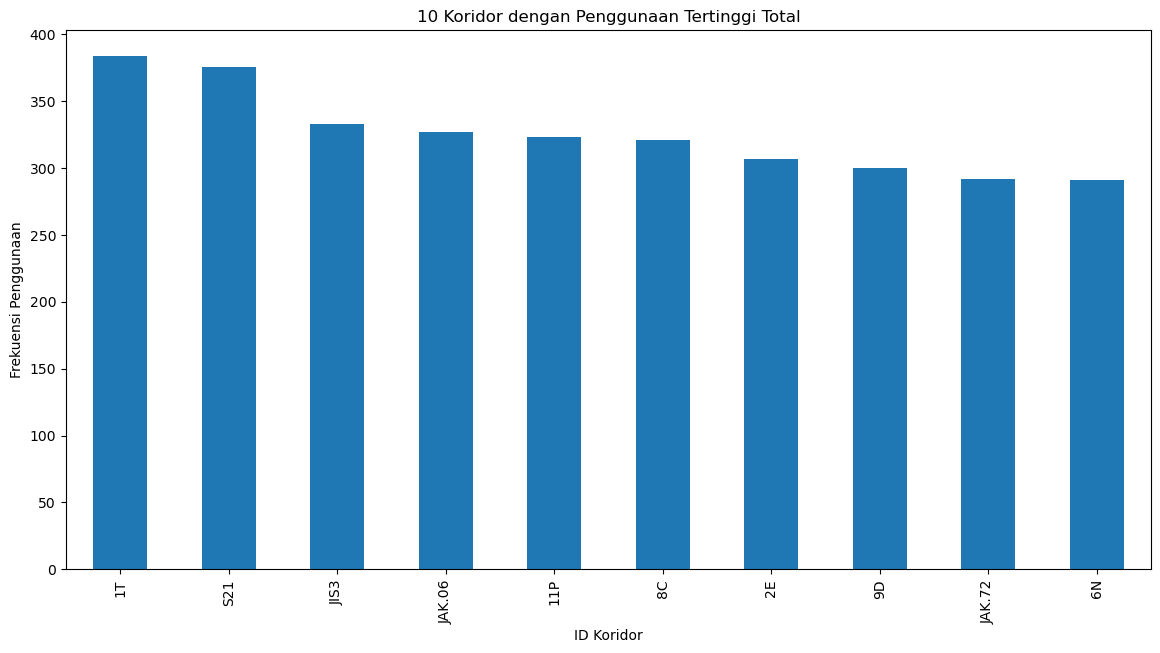

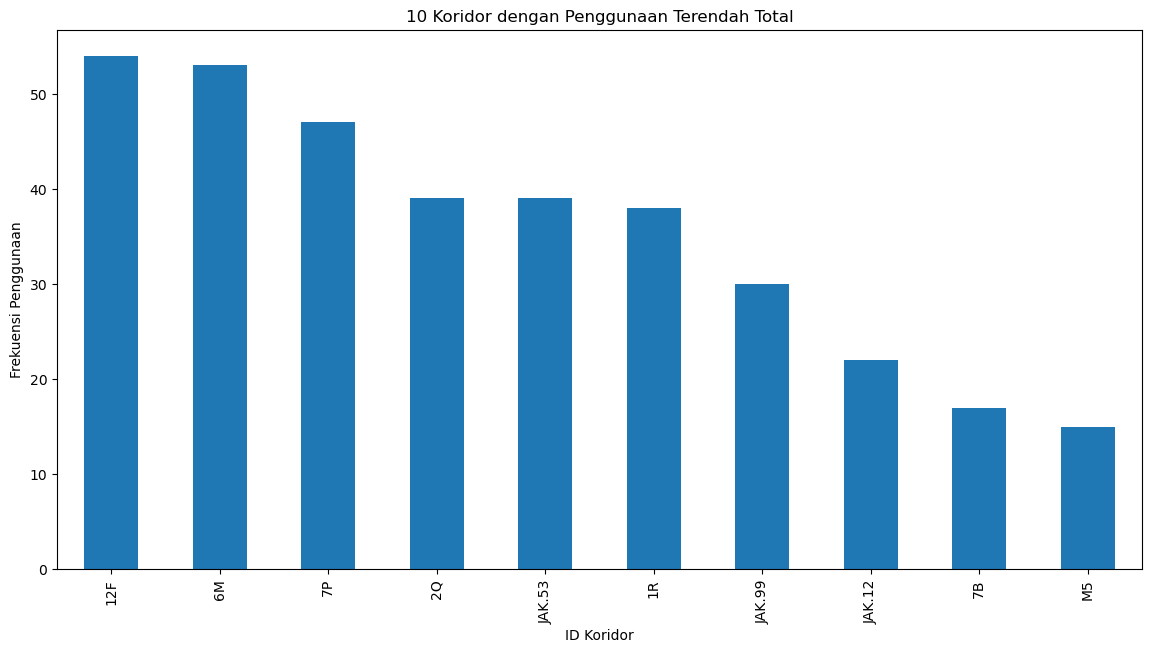

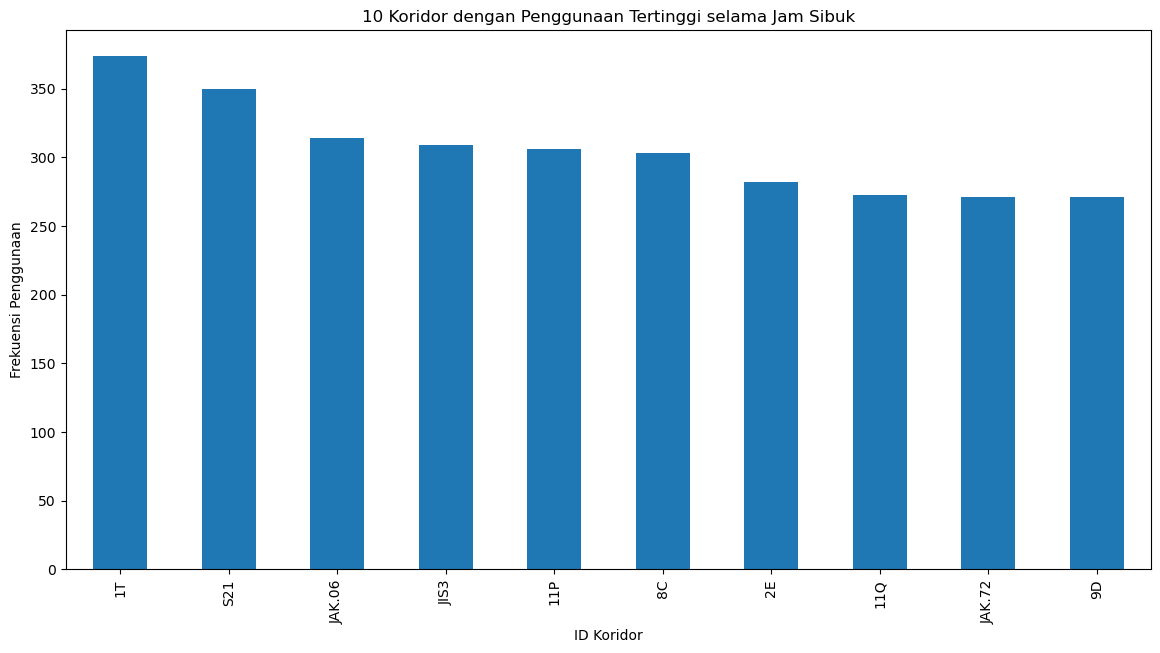

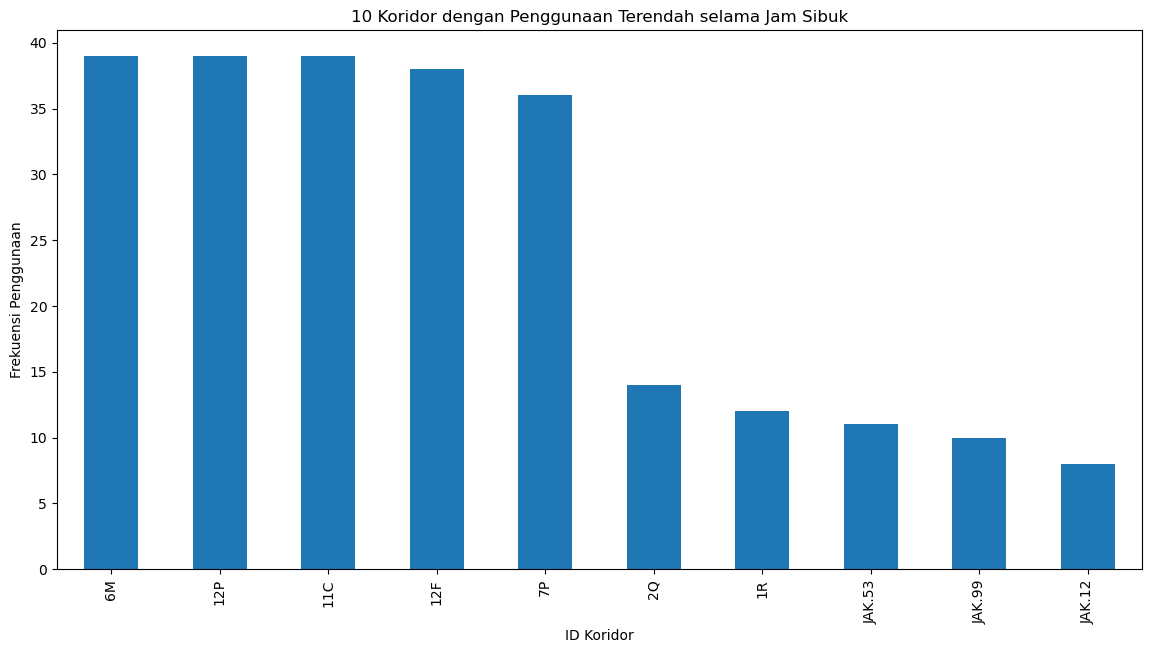

In [365]:
# Menambahkan kolom untuk jam tap-in dan hari dalam minggu
df_cleaned['tapInHour'] = df_cleaned['tapInTime'].dt.hour
df_cleaned['day_of_week'] = df_cleaned['tapInTime'].dt.dayofweek

# Mendefinisikan jam sibuk (5-9 pagi dan 16-21 malam) pada hari kerja (Senin-Jumat)
df_cleaned['is_peak_hour'] = df_cleaned.apply(lambda x: 1 if (x['day_of_week'] < 5 and (5 <= x['tapInHour'] <= 9 or 16 <= x['tapInHour'] <= 21)) else 0, axis=1)

# Filter data untuk jam sibuk pada hari kerja
peak_hour_data = df_cleaned[df_cleaned['is_peak_hour'] == 1]
non_peak_hour_data = df_cleaned[df_cleaned['is_peak_hour'] == 0]

# Menghitung frekuensi penggunaan per koridor selama jam sibuk
corridor_peak_usage = peak_hour_data['corridorID'].value_counts()

# Menghitung frekuensi penggunaan per koridor untuk semua waktu
corridor_total_usage = df_cleaned['corridorID'].value_counts()

# Menampilkan bar plot untuk 10 koridor dengan penggunaan tertinggi total
top_10_corridors_total = corridor_total_usage.head(10)
print(top_10_corridors_total)
plt.figure(figsize=(14, 7))
top_10_corridors_total.plot(kind='bar', title='10 Koridor dengan Penggunaan Tertinggi Total')
plt.xlabel('ID Koridor')
plt.ylabel('Frekuensi Penggunaan')
plt.show()

# Menampilkan bar plot untuk 10 koridor dengan penggunaan terendah total
bottom_10_corridors_total = corridor_total_usage.tail(10)
plt.figure(figsize=(14, 7))
bottom_10_corridors_total.plot(kind='bar', title='10 Koridor dengan Penggunaan Terendah Total')
plt.xlabel('ID Koridor')
plt.ylabel('Frekuensi Penggunaan')
plt.show()

# Menampilkan bar plot untuk 10 koridor dengan penggunaan tertinggi selama jam sibuk
top_10_corridors_peak = corridor_peak_usage.head(10)
plt.figure(figsize=(14, 7))
top_10_corridors_peak.plot(kind='bar', title='10 Koridor dengan Penggunaan Tertinggi selama Jam Sibuk')
plt.xlabel('ID Koridor')
plt.ylabel('Frekuensi Penggunaan')
plt.show()

# Menampilkan bar plot untuk 10 koridor dengan penggunaan terendah selama jam sibuk
bottom_10_corridors_peak = corridor_peak_usage.tail(10)
plt.figure(figsize=(14, 7))
bottom_10_corridors_peak.plot(kind='bar', title='10 Koridor dengan Penggunaan Terendah selama Jam Sibuk')
plt.xlabel('ID Koridor')
plt.ylabel('Frekuensi Penggunaan')
plt.show()

**Observations**

Top 10 Corridors by Total Usage:
* The corridors with the highest overall usage are consistently busy throughout the day.
* These corridors likely serve high-density areas or major transit routes.

Bottom 10 Corridors by Total Usage:
* The corridors with the lowest overall usage are significantly less utilized.
* These corridors may serve areas with lower population density or less frequent demand.


Top 10 Corridors During Peak Hours:
* The busiest corridors during peak hours see a substantial increase in usage compared to non-peak times.
* These corridors are critical for accommodating the rush hour demand and likely serve key residential and commercial areas.

Bottom 10 Corridors During Peak Hours:
* The least used corridors during peak hours have low usage even during peak times.
* These corridors may not be as critical for peak hour operations and could be considered for resource reallocation.

corridorID
1T     7680000.0
B14    4380000.0
T21    3520000.0
D32    3460000.0
1K     3140000.0
S31    2900000.0
B13    2520000.0
6P     1840000.0
S12    1780000.0
D31    1700000.0
Name: payAmount, dtype: float64


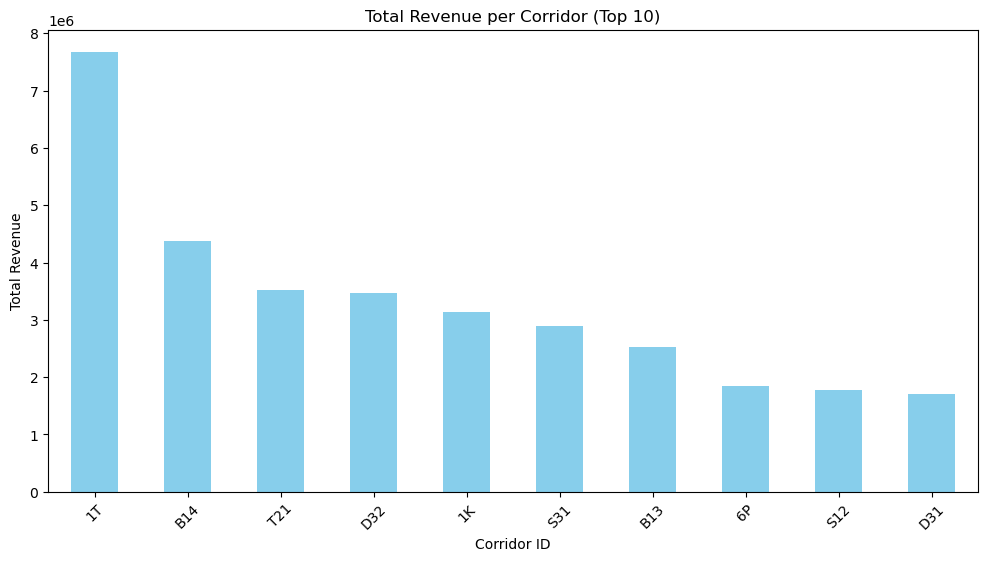

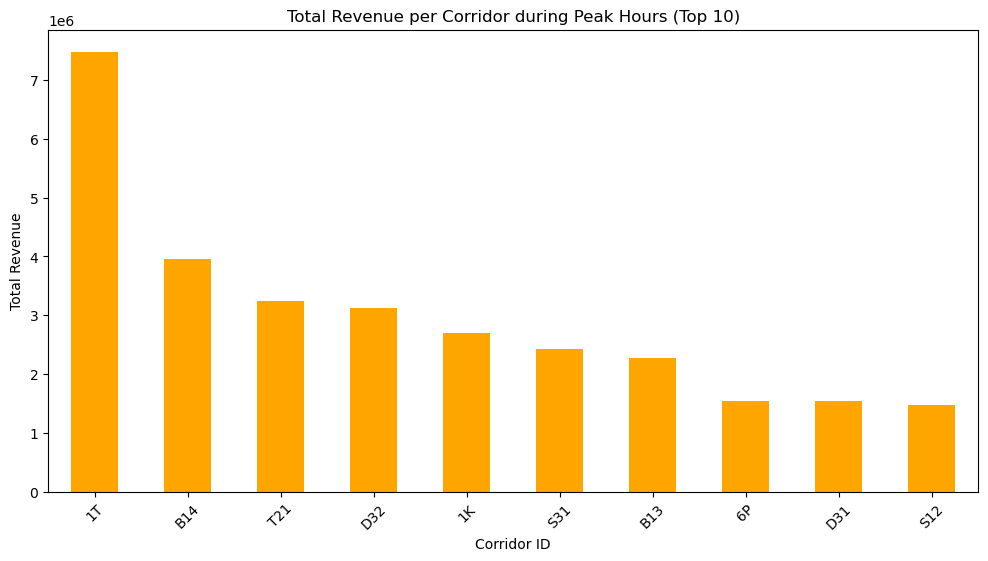

In [366]:
# Calculate total revenue per corridor
total_revenue_per_corridor = df_cleaned.groupby('corridorID')['payAmount'].sum()

# Sort the corridors by total revenue in descending order and select the top 10
top_10_revenue_corridors = total_revenue_per_corridor.sort_values(ascending=False).head(10)
print(top_10_revenue_corridors)

# Plotting the total revenue per corridor for the top 10 corridors
plt.figure(figsize=(12, 6))
top_10_revenue_corridors.plot(kind='bar', color='skyblue')
plt.title('Total Revenue per Corridor (Top 10)')
plt.xlabel('Corridor ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# Calculate total revenue per corridor for peak hours
total_revenue_per_corridor_peak = peak_hour_data.groupby('corridorID')['payAmount'].sum()

# Sort the corridors by total revenue in descending order and select the top 10 for peak hours
top_10_revenue_corridors_peak = total_revenue_per_corridor_peak.sort_values(ascending=False).head(10)

# Plotting the total revenue per corridor for the top 10 corridors during peak hours
plt.figure(figsize=(12, 6))
top_10_revenue_corridors_peak.plot(kind='bar', color='orange')
plt.title('Total Revenue per Corridor during Peak Hours (Top 10)')
plt.xlabel('Corridor ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

**Observations:**

Top 10 Corridors by Total Revenue:
* The top 10 corridors with the highest total revenue are identified.
* These corridors likely serve areas with high passenger demand and significant economic activity.

Top 10 Corridors by Total Revenue During Peak Hours:
* The top 10 corridors generating the most revenue during peak hours (5-9 AM and 4-9 PM) are identified.
* These corridors are critical for generating revenue during the busiest times of the day.

In [367]:
# Memilih koridor tertentu untuk analisis inferensial (misalnya, koridor dengan ID tertentu)
selected_corridor = '1T'  # Ganti dengan ID koridor yang diinginkan

# Mengelompokkan data berdasarkan tanggal untuk koridor yang dipilih
peak_corridor_daily = peak_hour_data[peak_hour_data['corridorID'] == selected_corridor].groupby('tapInTime').size()
non_peak_corridor_daily = non_peak_hour_data[non_peak_hour_data['corridorID'] == selected_corridor].groupby('tapInTime').size()

# Menggabungkan data menjadi satu dataframe untuk perbandingan
usage_data = pd.DataFrame({
    'Peak': peak_corridor_daily,
    'Non-Peak': non_peak_corridor_daily
}).fillna(0)

# Melakukan uji t
t_stat, p_val = stats.ttest_ind(usage_data['Peak'], usage_data['Non-Peak'])
print(f"T-Statistic: {t_stat}, P-Value: {p_val}")

# Hasil inferensi
if p_val < 0.05:
    print(f"Terdapat perbedaan signifikan dalam penggunaan koridor {selected_corridor} antara jam sibuk dan tidak sibuk.")
else:
    print(f"Tidak terdapat perbedaan signifikan dalam penggunaan koridor {selected_corridor} antara jam sibuk dan tidak sibuk.")


T-Statistic: 82.36637858286363, P-Value: 0.0
Terdapat perbedaan signifikan dalam penggunaan koridor 1T antara jam sibuk dan tidak sibuk.


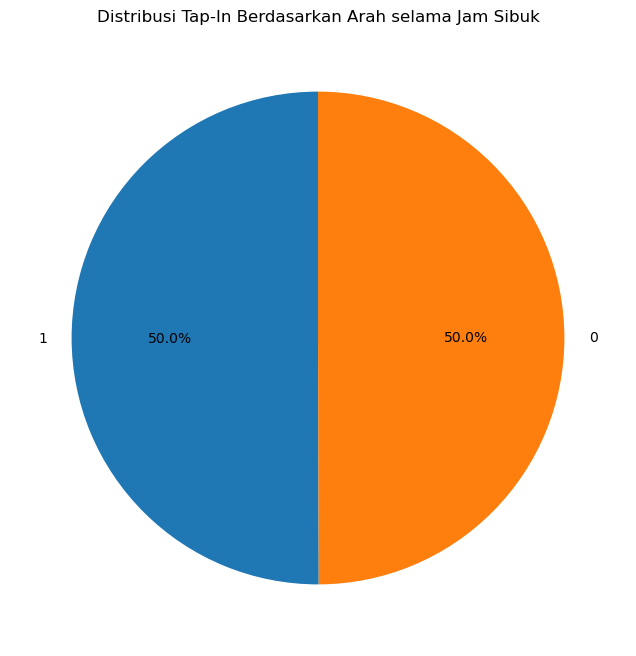

In [368]:
# Menghitung jumlah tap-in berdasarkan arah selama jam sibuk
tap_ins_by_direction = peak_hour_data['direction'].value_counts()

# Menampilkan pie chart untuk jumlah tap-in berdasarkan arah selama jam sibuk
plt.figure(figsize=(8, 8))
tap_ins_by_direction.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Distribusi Tap-In Berdasarkan Arah selama Jam Sibuk')
plt.ylabel('')
plt.show()


**Observations:**

* The pie chart shows the distribution of tap-ins based on direction during peak hours (5-9 AM and 4-9 PM).
* This analysis helps in understanding the flow of passengers in different directions during the busiest times of the day.
* Nonetheless, there is equal distribution of corridor direction usage by passengers during critical peak times. 

In [369]:
# Mengelompokkan data berdasarkan tanggal untuk analisis tap-in selama jam sibuk
tap_ins_by_direction_peak = peak_hour_data.groupby(['tapInTime', 'direction']).size().unstack(fill_value=0)

# Uji t untuk membandingkan jumlah tap-in antara arah Go dan Back selama jam sibuk
t_stat_tap_ins, p_val_tap_ins = stats.ttest_ind(tap_ins_by_direction_peak[0], tap_ins_by_direction_peak[1])
print(f"T-Statistic (Tap-Ins): {t_stat_tap_ins}, P-Value (Tap-Ins): {p_val_tap_ins}")

# Hasil inferensi untuk jumlah tap-in
if p_val_tap_ins < 0.05:
    print("Terdapat perbedaan signifikan dalam jumlah tap-in antara arah Go dan Back selama jam sibuk.")
else:
    print("Tidak terdapat perbedaan signifikan dalam jumlah tap-in antara arah Go dan Back selama jam sibuk.")


T-Statistic (Tap-Ins): -0.23233277953176532, P-Value (Tap-Ins): 0.816280349933602
Tidak terdapat perbedaan signifikan dalam jumlah tap-in antara arah Go dan Back selama jam sibuk.


**Key Insights**

* `Resource Allocation`: Focus resources on the top busiest corridors to ensure they are well-serviced with frequent buses and maintained to handle high passenger volumes efficiently. This applies to both overall usage and peak hour usage. Review the bottom routes to determine if service levels can be adjusted or resources can be reallocated to more critical areas. This includes increasing the frequency of buses by shifting fleets from bottom corridors and reallocating them to busiest corridors to ensuring punctuality during these critical times. This is important for optimizing operations and ensuring that resources are used where they are most needed. 
* `Operational Efficiency`: Ensuring the top 10 busiest corridors during peak hours are prioritized which can reduce congestion and improve the flow of passengers, enhancing overall operational efficiency. This is critical for both maximizing revenue and improving the customer experience. Also, identifying and potentially reducing services on less busy corridors during non-peak times can optimize resource usage, allowing TransJakarta to better match supply with demand.
* `Service Expansion`: Consider expanding services on the top revenue-generating corridors, such as adding more adjacent routes to further boost revenue. This strategic expansion can help TransJakarta grow its market.

**Tap-In & Tap-Out Analysis**

Penjaringan          493.0
BKN                  461.0
BNN LRT              250.0
Cibubur Junction     246.0
Rusun Kapuk Muara    237.0
Penggilingan         234.0
Garuda Taman Mini    230.0
Pecenongan           216.0
Monas                210.0
Ragunan              207.0
Name: count, dtype: float64


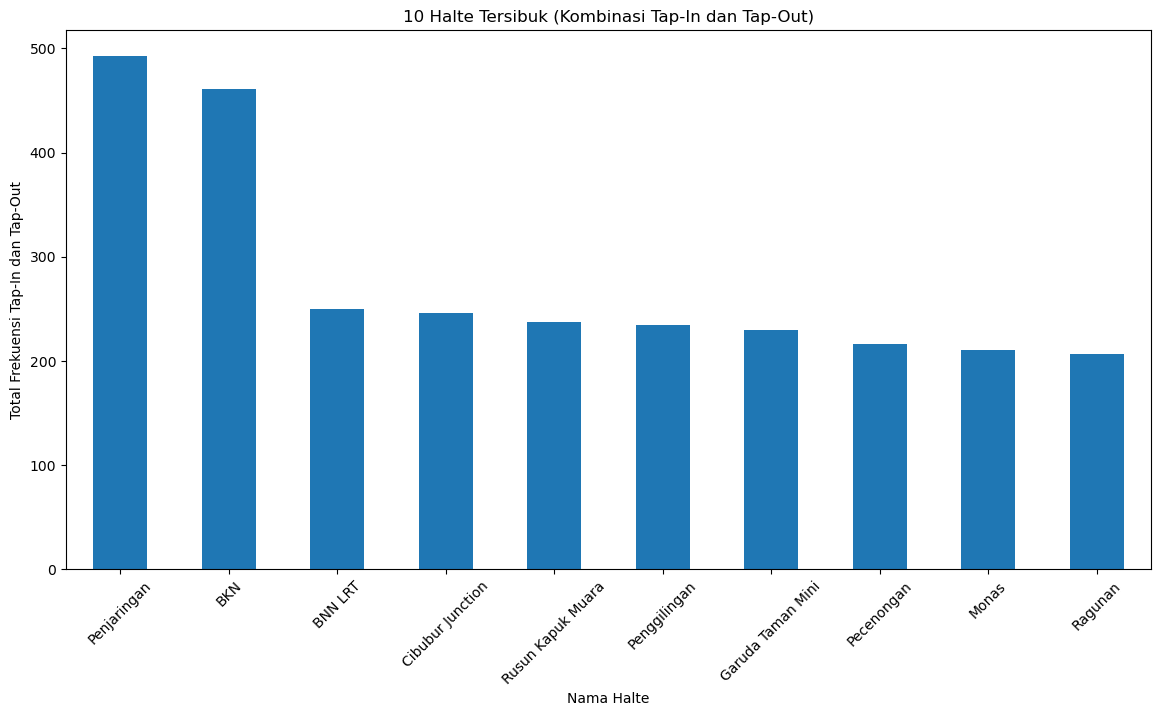

Penjaringan          229
Garuda Taman Mini    198
BKN                  159
BNN LRT              145
Rusun Kapuk Muara    125
Penggilingan         125
Cibubur Junction     120
Pecenongan           95 
Ragunan              62 
Monas                52 
Name: count, dtype: int64


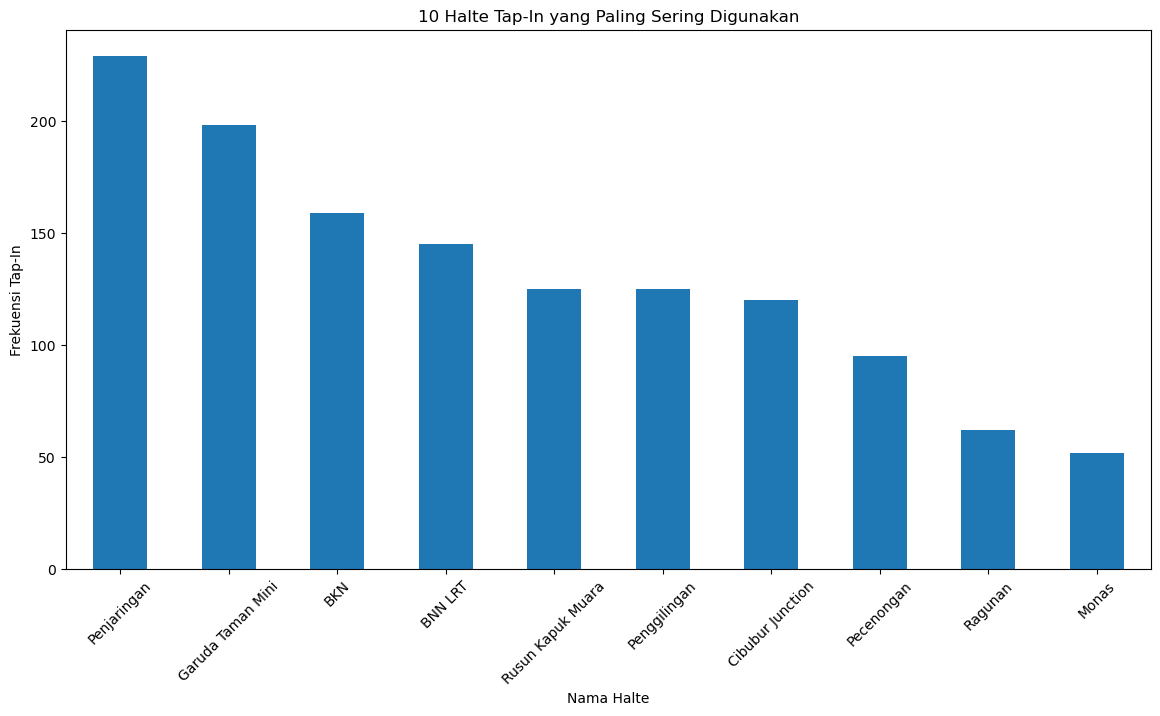

BKN                  302
Penjaringan          264
Monas                158
Ragunan              145
Cibubur Junction     126
Pecenongan           121
Rusun Kapuk Muara    112
Penggilingan         109
BNN LRT              105
Garuda Taman Mini    32 
Name: count, dtype: int64


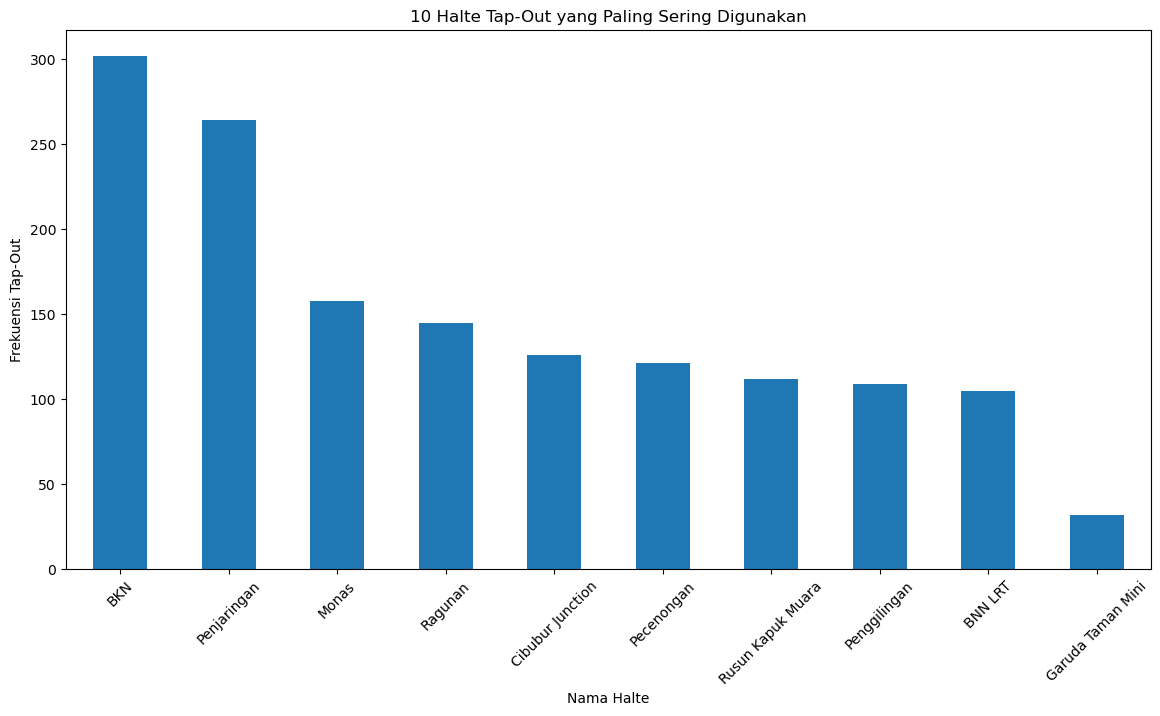

In [370]:
# Calculate frequency of tap-in per stop
tap_in_frequencies = df_cleaned['tapInStopsName'].value_counts()

# Calculate frequency of tap-out per stop
tap_out_frequencies = df_cleaned['tapOutStopsName'].value_counts()

# Combine frequencies for tap-in and tap-out
combined_frequencies = tap_in_frequencies.add(tap_out_frequencies, fill_value=0)

# Identify top 10 busiest stops overall
top_10_busiest_stops = combined_frequencies.sort_values(ascending=False).head(10)
print(top_10_busiest_stops)

# Plotting the combined total frequency for top 10 busiest stops
plt.figure(figsize=(14, 7))
top_10_busiest_stops.plot(kind='bar')
plt.title('10 Halte Tersibuk (Kombinasi Tap-In dan Tap-Out)')
plt.xlabel('Nama Halte')
plt.ylabel('Total Frekuensi Tap-In dan Tap-Out')
plt.xticks(rotation=45)
plt.show()

# Plotting individual tap-in and tap-out frequencies for comparison
top_10_tap_in_stops = tap_in_frequencies.loc[top_10_busiest_stops.index].sort_values(ascending=False)
print(top_10_tap_in_stops)

# Plotting the tap-in frequencies for top 10 busiest stops
plt.figure(figsize=(14, 7))
top_10_tap_in_stops.plot(kind='bar')
plt.title('10 Halte Tap-In yang Paling Sering Digunakan')
plt.xlabel('Nama Halte')
plt.ylabel('Frekuensi Tap-In')
plt.xticks(rotation=45)
plt.show()

top_10_tap_out_stops = tap_out_frequencies.loc[top_10_busiest_stops.index].sort_values(ascending=False)
print(top_10_tap_out_stops)

# Plotting the tap-out frequencies for top 10 busiest stops
plt.figure(figsize=(14, 7))
top_10_tap_out_stops.plot(kind='bar')
plt.title('10 Halte Tap-Out yang Paling Sering Digunakan')
plt.xlabel('Nama Halte')
plt.ylabel('Frekuensi Tap-Out')
plt.xticks(rotation=45)
plt.show()

**Observations:**

Top 10 Busiest Stops Overall:
* These stops likely serve as major transit points or hubs with high passenger turnover.

Top 10 Tap-In Stops:
* The most frequently used stops for tap-in indicate where passengers are primarily boarding the buses.
* These stops are likely located in residential areas or near points of interest where people start their journeys.

Top 10 Tap-Out Stops:
* The most frequently used stops for tap-out indicate where passengers are predominantly alighting the buses.
* These stops are likely situated near commercial districts, workplaces, or other destinations.

tapInStopsName
Bundaran Senayan 1     1626500.0
Gelora Bung Karno 1    1626500.0
Bintaro Xchange        1320000.0
St. MRT Fatmawati      1287000.0
Kemenkes 2             1270000.0
Cibubur Junction       1030500.0
Bundaran Senayan 2     899500.0 
SPBU Limo Cinere 1     880000.0 
Balai Kota 1           867500.0 
GBK Pintu 7            844500.0 
Name: payAmount, dtype: float64


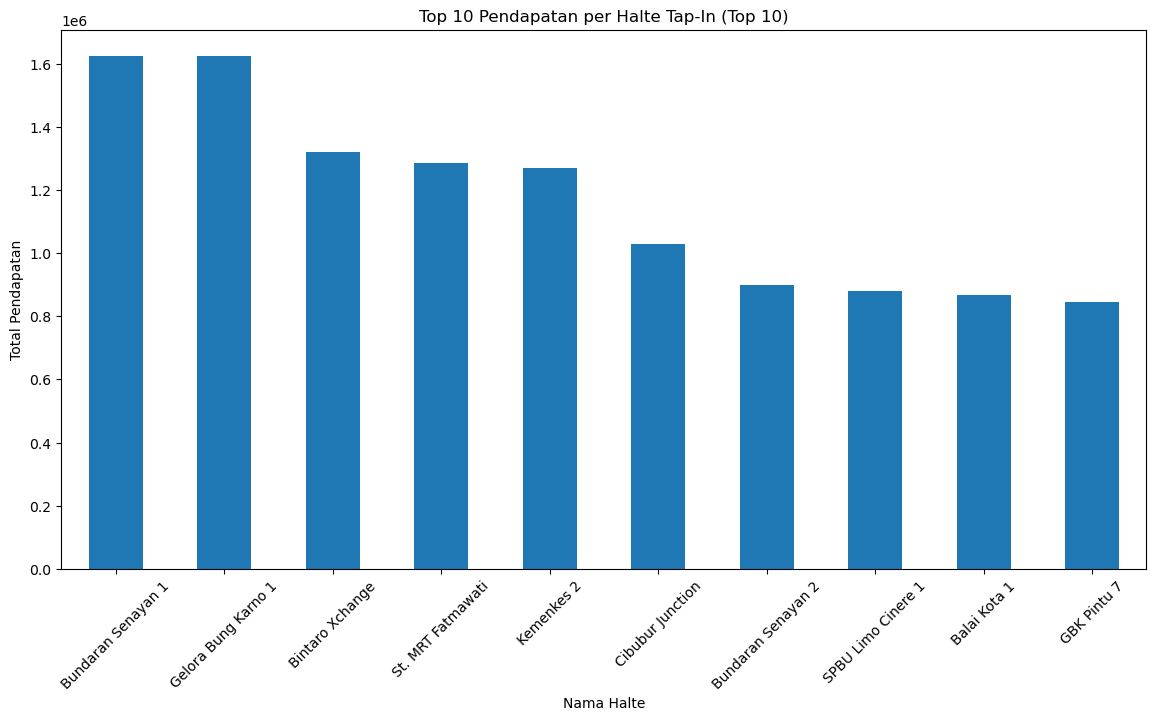

In [371]:
# Calculate total revenue from tap-ins per stop
tap_in_revenue = df_cleaned.groupby('tapInStopsName')['payAmount'].sum()

# Identify top 10 stops by total revenue from tap-ins
top_10_revenue_tap_in_stops = tap_in_revenue.sort_values(ascending=False).head(10)
print(top_10_revenue_tap_in_stops)

# Plotting the total revenue per stop for the top 10 stops by revenue
plt.figure(figsize=(14, 7))
top_10_revenue_tap_in_stops.plot(kind='bar')
plt.title('Top 10 Pendapatan per Halte Tap-In (Top 10)')
plt.xlabel('Nama Halte')
plt.ylabel('Total Pendapatan')
plt.xticks(rotation=45)
plt.show()

**Observations:**

Top Revenue-Generating Stops:

* The top revenue-generating stops include key locations such as "Bundaran Senayan 1," "Gelora Bung Karno 1," and "Bintaro Xchange."
* These stops are strategically located, likely near major commercial or residential areas, contributing to their high passenger traffic and revenue.
* Revenue is highly concentrated in the top few stops. "Bundaran Senayan 1" and "Gelora Bung Karno 1" alone account for a significant portion of the total revenue. Some stops might be part of corridors with higher ticket prices, contributing to their higher revenue although they may not be in top tap-in stops.
* This indicates that a substantial part of TransJakarta's revenue comes from a limited number of stops.

count    34506.000000
mean     72.142600   
std      28.055040   
min      15.000000   
25%      51.133333   
50%      71.916667   
75%      95.733333   
max      179.050000  
Name: tripDuration, dtype: float64


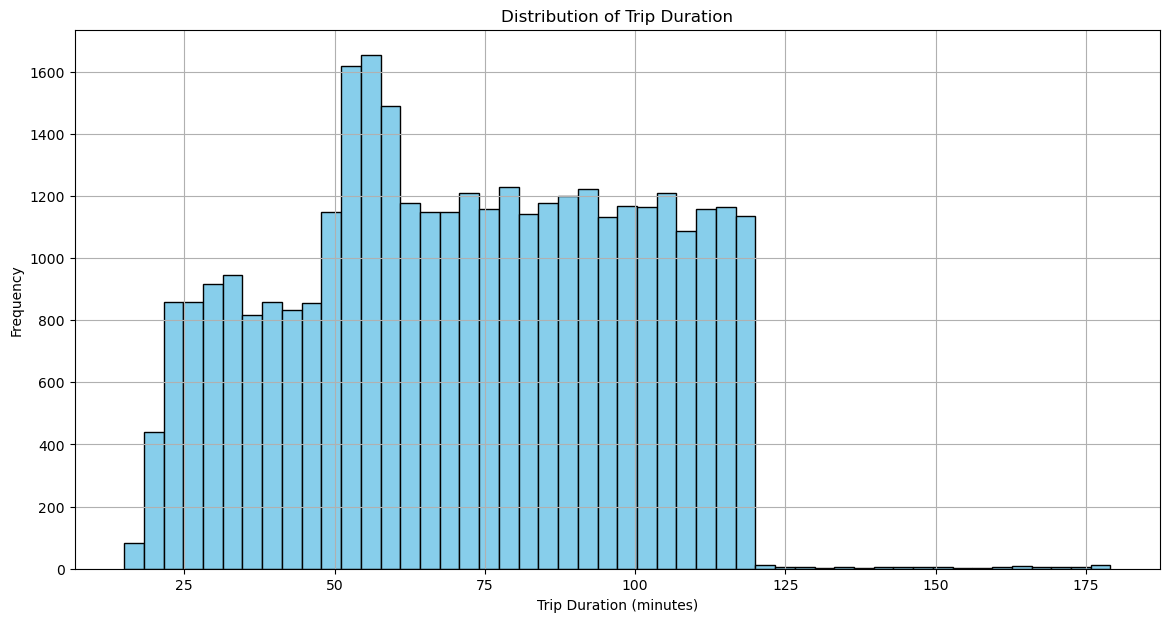

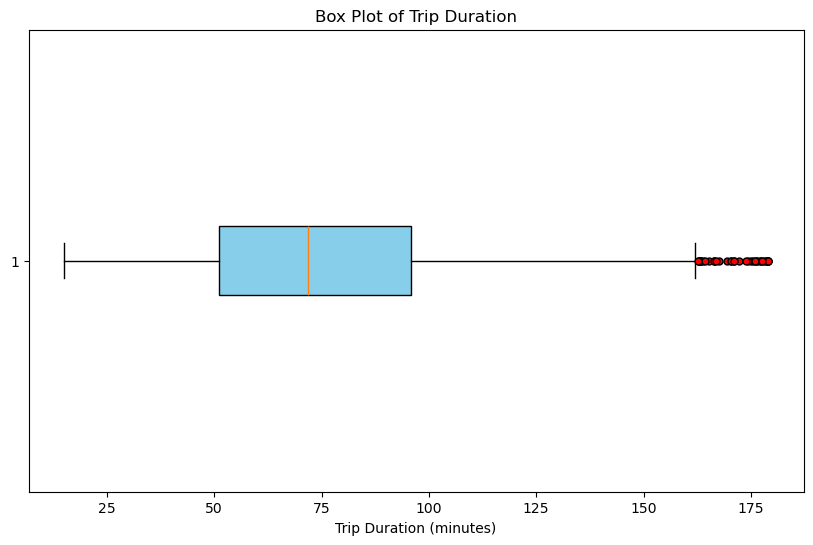

In [372]:
# Calculate trip duration in minutes
df_cleaned['tripDuration'] = (df_cleaned['tapOutTime'] - df_cleaned['tapInTime']).dt.total_seconds() / 60

# Remove any negative durations or NaN values
trip_duration = df_cleaned[df_cleaned['tripDuration'] >= 0]

# Display some basic statistics
trip_duration_stats = trip_duration['tripDuration'].describe()
print(trip_duration_stats)

# Plotting the histogram of trip durations
plt.figure(figsize=(14, 7))
plt.hist(trip_duration['tripDuration'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting the box plot for trip durations
plt.figure(figsize=(10, 6))
plt.boxplot(trip_duration['tripDuration'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'), whiskerprops=dict(color='black'), capprops=dict(color='black'), flierprops=dict(markerfacecolor='red', marker='o', markersize=5, linestyle='none'))
plt.title('Box Plot of Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.show()


**Observations:**

Distribution of Trip Duration:
* The histogram shows the frequency distribution of trip durations among TransJakarta passengers.
* The majority of trips have durations between 50 to 100 minutes, with peaks around 50-70 minutes.
* There are fewer trips that last longer than 120 minutes, indicating that most passengers use TransJakarta for relatively medium commutes.
* This suggests that many passengers use TransJakarta for medium-length commutes, likely to and from work or other regular activities.
* Short trips might not be as common due to the nature of TransJakarta routes, and very long trips might indicate extended travel times due to traffic or longer routes.
* The box plot presents the interquartile range (IQR), which spans from the 25th percentile (around 50 minutes) to the 75th percentile (around 95 minutes).

**Key Insights:**
* `Resource Allocation`: Focus on these top busiest and revenue generating stops to ensure they are well-serviced with frequent buses and maintained to handle high passenger volumes efficiently. These stops are critical for maximizing revenue and should receive priority in resource allocation. Invest in maintaining and upgrading infrastructure at these high-revenue stops to ensure reliability and comfort for passengers. This includes amenities such as seating, shelter, and information displays.
* `Operational Efficiency`: Ensure that these high-revenue stops are adequately managed during peak hours to avoid overcrowding and delays. Efficiently managing these stops can significantly improve the overall flow of passengers and reduce congestion. Adjust bus schedules to ensure timely service at these high-demand stops. More frequent service during peak hours can help distribute the passenger load more evenly and optimize revenue collection.
* `Strategic Planning`: Consider expanding services or adding routes that directly connect the top revenue-generating stops to reduce transfer times and improve convenience for passengers. This strategic expansion can help TransJakarta grow its market share. Use the insights from the revenue analysis to optimize the network layout, ensuring that high-demand, high-revenue stops are well-integrated into the overall transit system.
* `Revenue Opportunities`: Installing vending machines at the highest-revenue stops can provide convenience for passengers and generate additional revenue. These machines can offer snacks, beverages, and other essentials, catering to passengers' needs while they wait. Setting up small express cafes or kiosks at these high-traffic, high-revenue stops can offer passengers quick meals, coffee, and other refreshments. This not only enhances the passenger experience but also creates a new revenue stream for TransJakarta. Partnering with retail brands to set up small shops or promotional stands at the highest-revenue stops can attract more passengers and provide a diversified revenue source. This can include both permanent setups and temporary promotions.

**Customer Demographics**

payCardSex
F    1034
M    908 
Name: count, dtype: int64
payCardSex
F    18378
M    16128
Name: count, dtype: int64


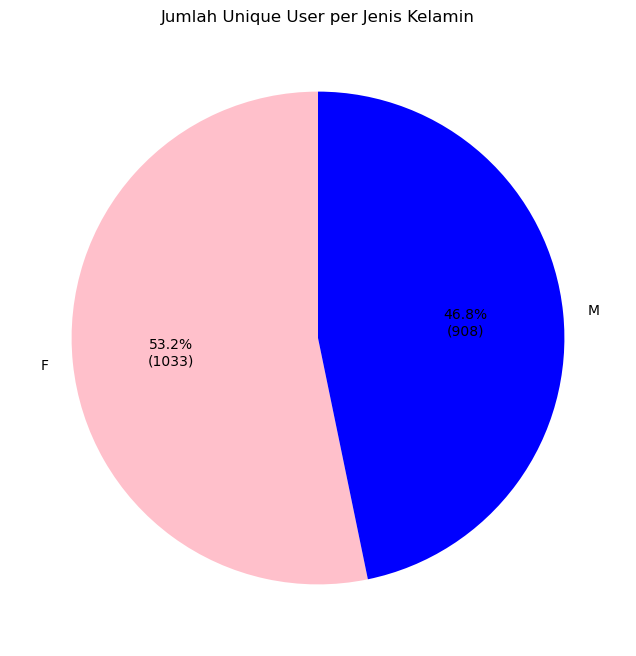

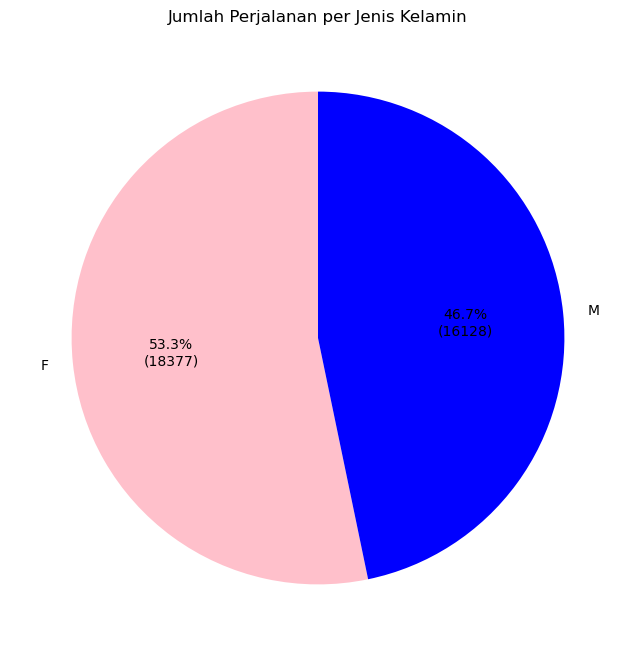

In [373]:

# Get unique users
unique_users = df_cleaned.drop_duplicates(subset=['payCardID'])

# Calculate the distribution of unique users by gender
gender_distribution = unique_users['payCardSex'].value_counts()
print(gender_distribution)

# Calculate the number of trips per gender
trips_per_gender = df_cleaned['payCardSex'].value_counts()
print(trips_per_gender)

# Function to display both the number and percentage in pie chart
def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Plot pie chart for number of unique users by gender
plt.figure(figsize=(8, 8))
gender_distribution.plot(
    kind='pie', 
    autopct=lambda pct: func(pct, gender_distribution), 
    startangle=90, 
    colors=['blue' if gender == 'M' else 'pink' for gender in gender_distribution.index], 
    title='Jumlah Unique User per Jenis Kelamin'
)
plt.ylabel('')
plt.show()

# Plot pie chart for number of trips per gender with specific colors
plt.figure(figsize=(8, 8))
trips_per_gender.plot(
    kind='pie', 
    autopct=lambda pct: func(pct, trips_per_gender), 
    startangle=90, 
    colors=['blue' if gender == 'M' else 'pink' for gender in trips_per_gender.index], 
    title='Jumlah Perjalanan per Jenis Kelamin'
)
plt.ylabel('')
plt.show()
plt.show()

**Observations**

Unique Users:
* The pie chart shows the distribution of unique users by gender. This represents the proportion of male and female users who have used TransJakarta services.
* The distribution is calculated by counting the unique payCardID for each gender.
* This indicates a slightly higher number of female users compared to male users in the TransJakarta service.

Trip Gender Distribution:
* The pie chart displays the distribution of the total number of trips taken by gender. This shows how many trips were made by male and female passengers.
* The distribution is calculated by counting the total number of trips (transID occurrences) for each gender.
* The proportion of trips is very similar to the unique user gender proportion.

payCardSex    F    M
corridorID          
1T          158  226
S21         124  252
JIS3        125  208
JAK.06      173  154
11P         159  164
8C          167  154
2E          209  98 
9D          220  80 
JAK.72      98   194
6N          136  155


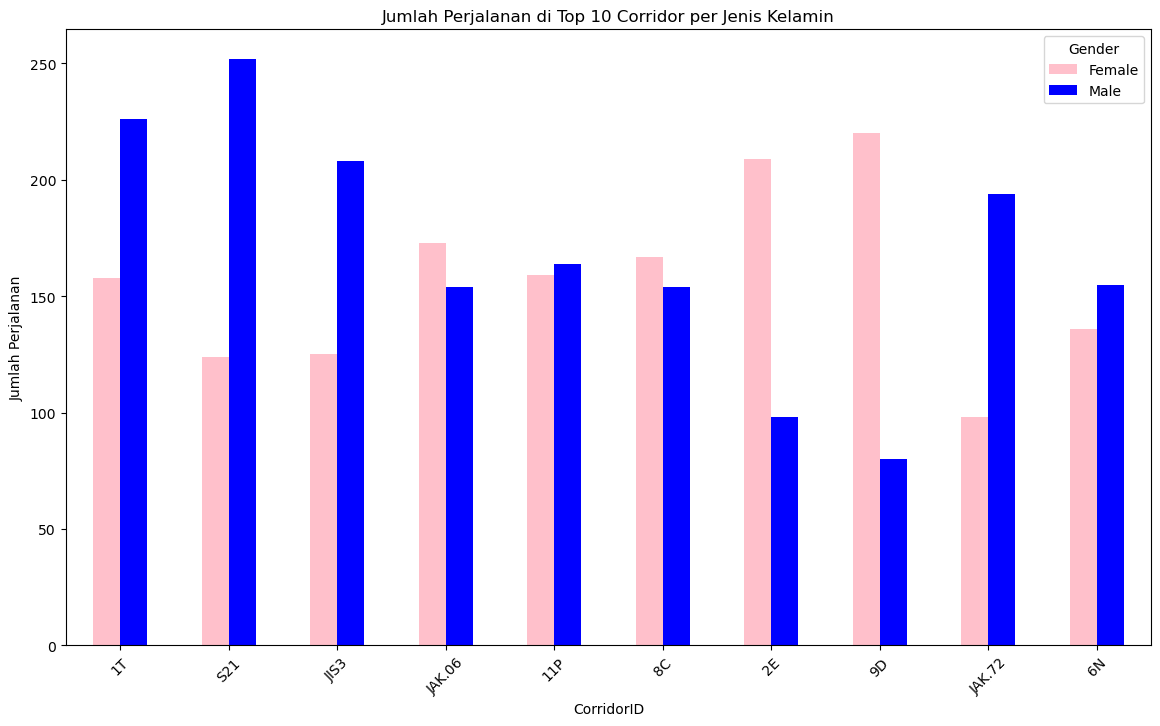

payCardSex           F    M
tapInStopsName             
BKN                44   115
BNN LRT            48   97 
Cibubur Junction   26   94 
Garuda Taman Mini  81   117
Pejaten            78   66 
Penggilingan       79   46 
Penjaringan        130  99 
Petojo             59   50 
Rusun Kapuk Muara  63   62 
Seskoal            98   22 


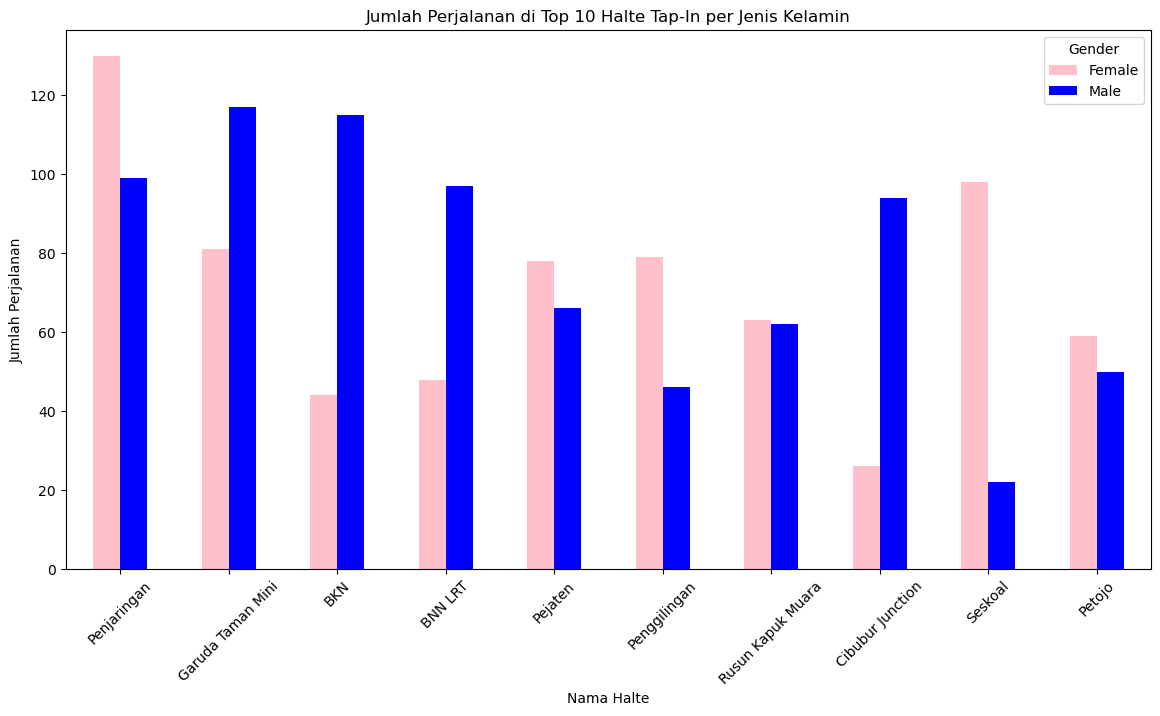

payCardSex                F    M
tapOutStopsName                 
BKN                     151  151
Jembatan Item           42   85 
Kejaksaan Agung         66   63 
Monas                   76   82 
Penjaringan             132  132
Pinang Ranti            43   99 
Pluit                   30   98 
Ragunan                 76   69 
Term. Kampung Rambutan  38   120
Term. Senen             77   111


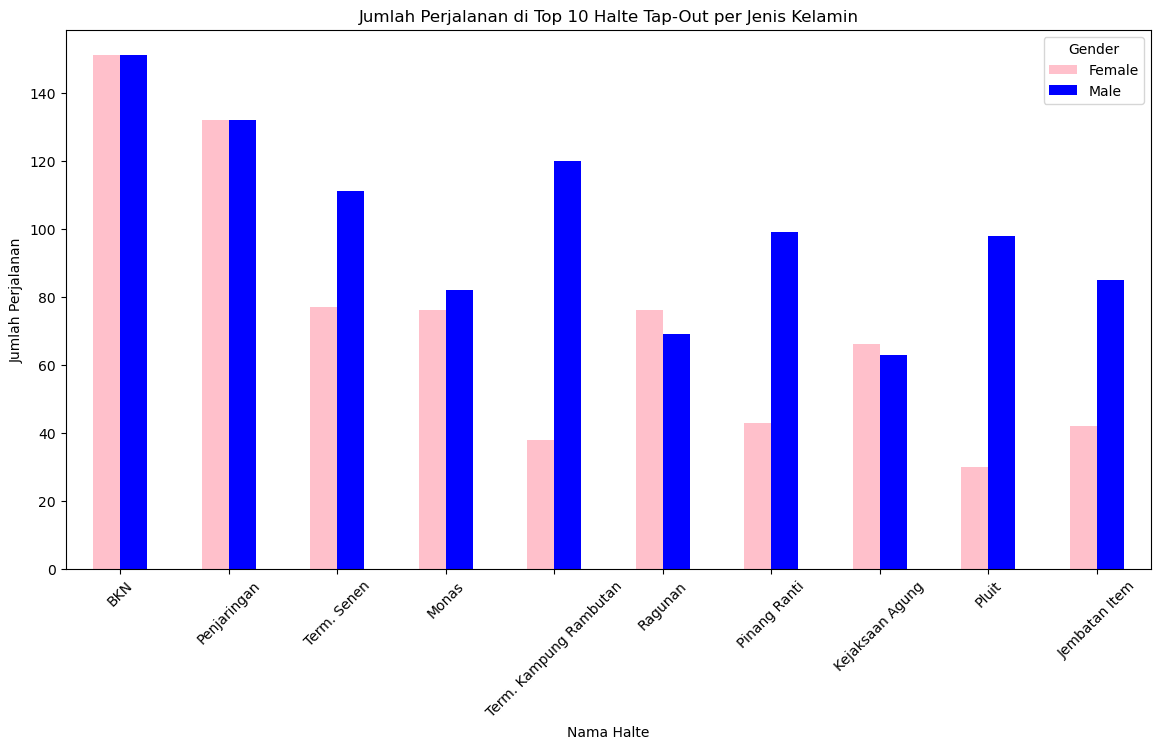

In [374]:
# Identify the top 10 corridors by number of trips
top_10_corridors = df_cleaned['corridorID'].value_counts().head(10).index
top_10_corridors_df = df_cleaned[df_cleaned['corridorID'].isin(top_10_corridors)]

# Calculate the number of trips for each gender within the top 10 corridors
gender_corridor_counts = top_10_corridors_df.groupby(['corridorID', 'payCardSex']).size().unstack().fillna(0)

# Sort the corridors by total number of trips in descending order
gender_corridor_counts['Total'] = gender_corridor_counts.sum(axis=1)
gender_corridor_counts = gender_corridor_counts.sort_values(by='Total', ascending=False).drop(columns='Total')
print(gender_corridor_counts)

# Plot the data
ax = gender_corridor_counts.plot(kind='bar', figsize=(14, 8), color=['Pink', 'Blue'])

# Customize the plot
plt.title('Jumlah Perjalanan di Top 10 Corridor per Jenis Kelamin')
plt.xlabel('CorridorID')
plt.ylabel('Jumlah Perjalanan')
plt.xticks(rotation=45)
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

# Menghitung jumlah perjalanan untuk 10 halte teratas tap-in
top_in_stops = df_cleaned['tapInStopsName'].value_counts().head(10).index
df_top_in_stops = df_cleaned[df_cleaned['tapInStopsName'].isin(top_in_stops)]

# Mengelompokkan data berdasarkan halte dan jenis kelamin
trips_per_gender_in_stop = df_top_in_stops.groupby(['tapInStopsName', 'payCardSex']).size().unstack().fillna(0)
print(trips_per_gender_in_stop)

# Menentukan warna untuk jenis kelamin
colors = ['pink', 'blue']

# Menampilkan grafik batang gabungan untuk tap-in stops dengan warna spesifik
trips_per_gender_in_stop['total'] = trips_per_gender_in_stop.sum(axis=1)
trips_per_gender_in_stop = trips_per_gender_in_stop.sort_values(by='total', ascending=False).drop(columns=['total'])
ax = trips_per_gender_in_stop.plot(kind='bar', stacked=False, figsize=(14, 7), color=colors)
plt.title('Jumlah Perjalanan di Top 10 Halte Tap-In per Jenis Kelamin')
plt.xlabel('Nama Halte')
plt.ylabel('Jumlah Perjalanan')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.xticks(rotation=45)
plt.show()

# Menghitung jumlah perjalanan untuk 10 halte teratas tap-out
top_out_stops = df_cleaned['tapOutStopsName'].value_counts().head(10).index
df_top_out_stops = df_cleaned[df_cleaned['tapOutStopsName'].isin(top_out_stops)]

# Mengelompokkan data berdasarkan halte dan jenis kelamin
trips_per_gender_out_stop = df_top_out_stops.groupby(['tapOutStopsName', 'payCardSex']).size().unstack().fillna(0)
print(trips_per_gender_out_stop)

# Menampilkan grafik batang gabungan untuk tap-out stops dengan warna spesifik
trips_per_gender_out_stop['total'] = trips_per_gender_out_stop.sum(axis=1)
trips_per_gender_out_stop = trips_per_gender_out_stop.sort_values(by='total', ascending=False).drop(columns=['total'])
ax = trips_per_gender_out_stop.plot(kind='bar', stacked=False, figsize=(14, 7), color=colors)
plt.title('Jumlah Perjalanan di Top 10 Halte Tap-Out per Jenis Kelamin')
plt.xlabel('Nama Halte')
plt.ylabel('Jumlah Perjalanan')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.xticks(rotation=45)
plt.show()

**Observations:**

Gender Distribution in Top 10 Corridors:
* The bar chart shows the distribution of trips for males and females within the top 10 corridors by the number of trips.
* Some corridors have a higher number of male passengers (e.g., S21, JIS3, 6N), while others have more female passengers (e.g., JAK-06, 9D, 2E).
* The corridor '1T' shows a balanced distribution between male and female passengers.

Gender Distribution in Top 10 Tap-In Stops:
* The bar chart displays the number of trips by gender for the top 10 tap-in stops.
* Some stops, like Penjaringan, BKN, and Cibubur Junction, show a higher number of male passengers.
* Other stops, such as Garuda Taman Mini, Pejaten, and Penggilingan, have a higher number of female passengers.
* Some stops, like Penjaringan and BNN LRT, show a more balanced distribution between male and female passengers.

Gender Distribution in Top 10 Tap-Out Stops:
* The bar chart shows the distribution of trips for males and females at the top 10 tap-out stops.
* Stops like BKN, Terminal Kampung Rambutan, and Pluit have a higher number of male passengers.
* Stops like Term. Senen, Monas, and Ragunan have a more balanced distribution between male and female passengers.

In [375]:
# Separate data by gender
male_revenue = df_cleaned[df_cleaned['payCardSex'] == 'M']['payAmount']
female_revenue = df_cleaned[df_cleaned['payCardSex'] == 'F']['payAmount']

# Calculate summary statistics
male_mean = male_revenue.mean()
female_mean = female_revenue.mean()
male_std = male_revenue.std()
female_std = female_revenue.std()

print(f"Male Revenue: Mean = {male_mean}, Std Dev = {male_std}")
print(f"Female Revenue: Mean = {female_mean}, Std Dev = {female_std}")

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(male_revenue, female_revenue, equal_var=False)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the average revenue between male and female users.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average revenue between male and female users.")

Male Revenue: Mean = 2725.8804563492063, Std Dev = 4185.5238178345835
Female Revenue: Mean = 2695.1518119490697, Std Dev = 4266.744861972842
T-Statistic: 0.6742863915879159
P-Value: 0.5001338275967551
Fail to reject the null hypothesis: There is no significant difference in the average revenue between male and female users.


Invalid birthYear entries: 0
0        <18  
1        26-35
2        26-35
3        36-50
4        36-50
         ...  
37895    18-25
37896    36-50
37897    36-50
37898    36-50
37899    36-50
Name: ageGroup, Length: 1942, dtype: category
Categories (6, object): ['<18' < '18-25' < '26-35' < '36-50' < '51-65' < '65+']
0        <18  
1        26-35
2        26-35
3        36-50
4        36-50
         ...  
37895    18-25
37896    36-50
37897    36-50
37898    36-50
37899    36-50
Name: ageGroup, Length: 34506, dtype: category
Categories (6, object): ['<18' < '18-25' < '26-35' < '36-50' < '51-65' < '65+']


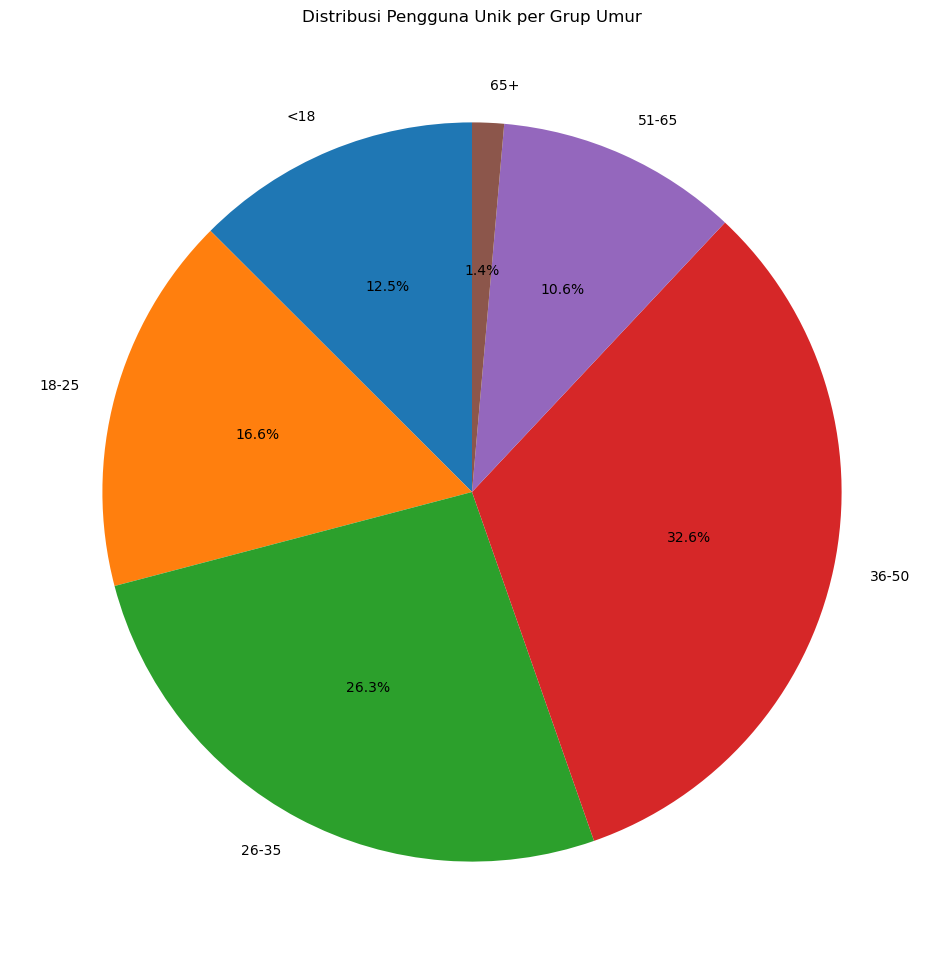

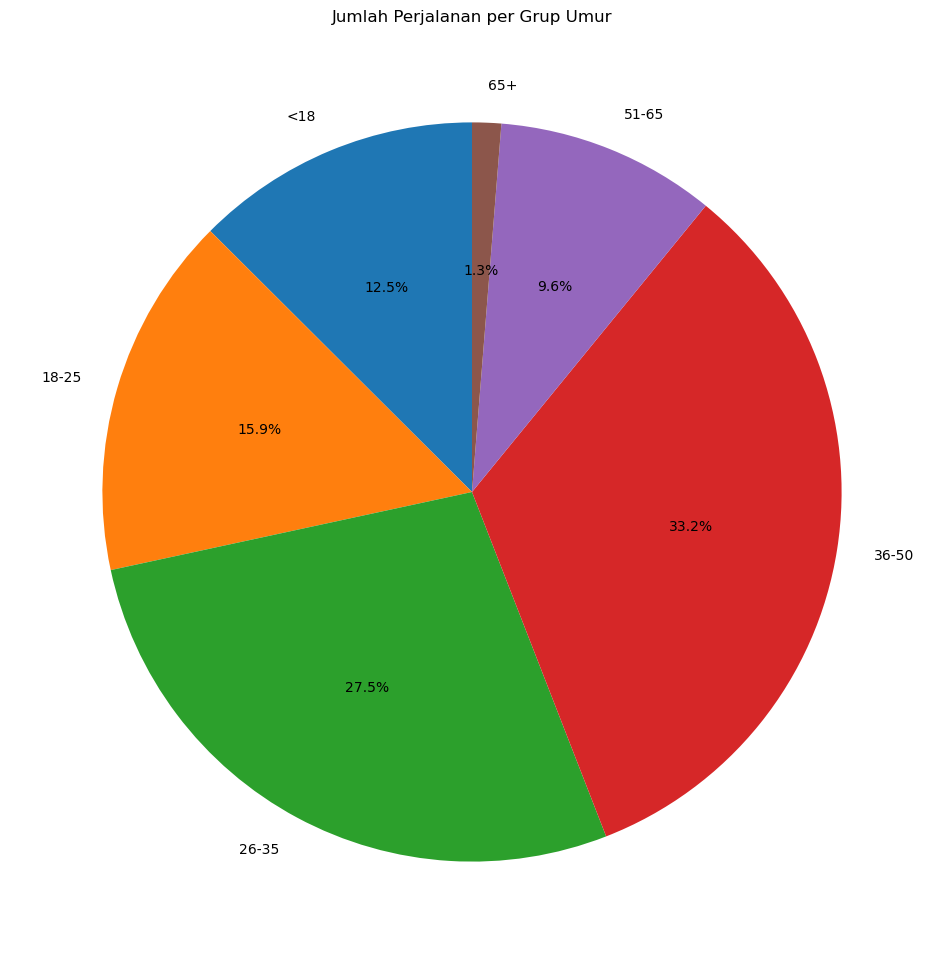

In [376]:
# Check for invalid years
invalid_birth_years = df_cleaned['payCardBirthDate'].isna().sum()
print(f"Invalid birthYear entries: {invalid_birth_years}")

# Calculate age from birth year
current_year = pd.Timestamp.now().year
unique_users['age'] = current_year - unique_users['payCardBirthDate']
df_cleaned['age'] = current_year - df_cleaned['payCardBirthDate']

# Group ages into categories
bins = [0, 18, 26, 36, 51, 66, 101]
labels = ['<18', '18-25', '26-35', '36-50', '51-65', '65+']
df_cleaned['ageGroup'] = pd.cut(df_cleaned['age'], bins=bins, labels=labels, right=False)
unique_users['ageGroup'] = pd.cut(unique_users['age'], bins=bins, labels=labels, right=False)

print(unique_users['ageGroup'])
print(df_cleaned['ageGroup'])

# Display the counts of each age group for unique users
unique_age_group_counts = unique_users['ageGroup'].value_counts().sort_index()

# Plot pie chart for the distribution of unique users by age group
plt.figure(figsize=(12, 12))
unique_age_group_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Distribusi Pengguna Unik per Grup Umur')
plt.ylabel('')
plt.show()

# Calculate the number of trips per age group
trips_per_age_group = df_cleaned['ageGroup'].value_counts().sort_index()

# Plot pie chart for number of trips per age group
plt.figure(figsize=(12, 12))
trips_per_age_group.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Jumlah Perjalanan per Grup Umur')
plt.ylabel('')
plt.show()


**Observations:**

Unique Users by Age Group:
* The pie chart shows the distribution of unique users by age group.
* The largest group of unique users falls within the '36-50' age group, comprising 32.7% of the total.
* The '26-35' age group is the second-largest, making up 26.3% of the unique users.
* The '18-25' age group constitutes 16.6% of the unique users.
* The '51-65' age group accounts for 10.6% of the unique users.
* The '0-18' age group makes up 12.5% of the unique users.
* The '65+' age group is the smallest, with only 1.4% of the unique users.

Trips by Age Group:
* The pie chart displays the distribution of trips by age group.
* The '36-50' age group accounts for the highest number of trips, representing 33.2% of the total trips.
* The '26-35' age group is the second-highest, with 27.5% of the trips.
* The '18-25' age group makes up 15.9% of the trips.
* The '51-65' age group accounts for 9.6% of the trips.
* The '0-18' age group contributes to 12.5% of the trips.
* The '65+' age group has the smallest share of trips, at 1.3%.

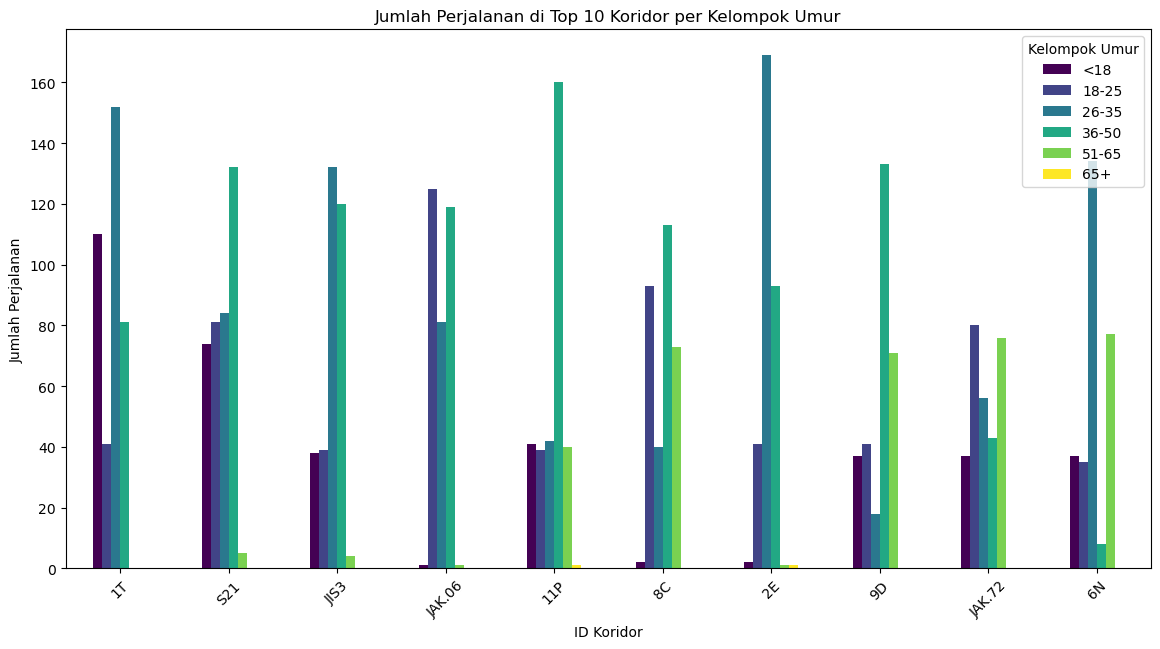

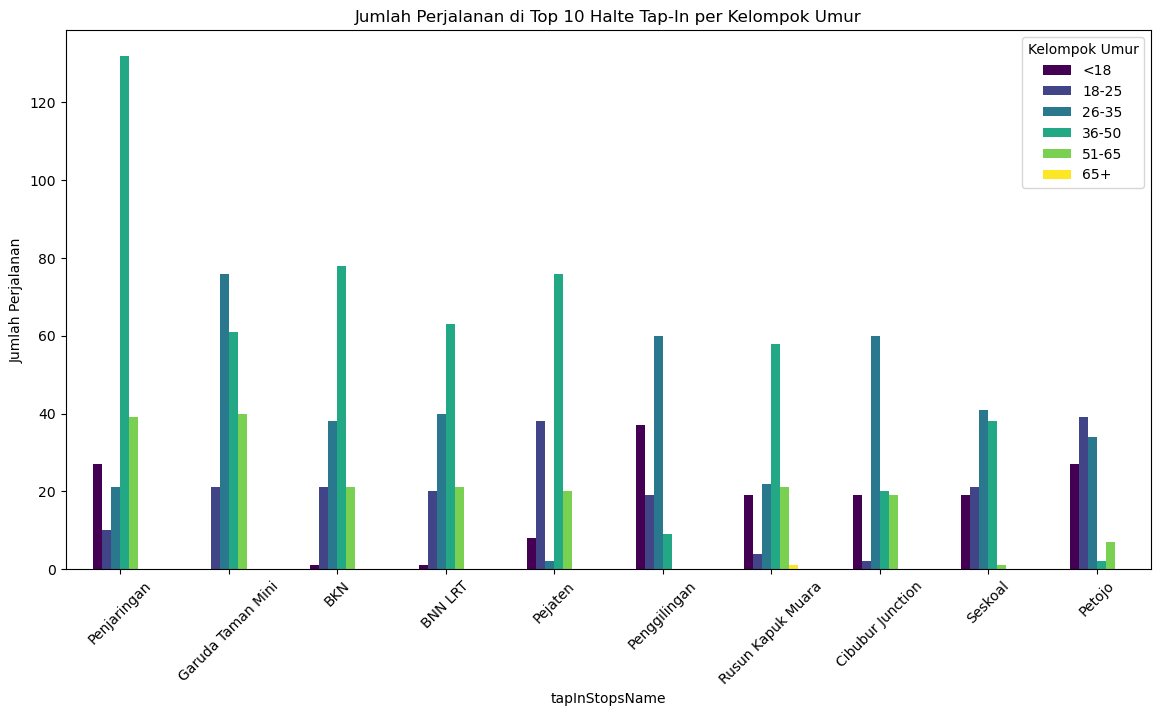

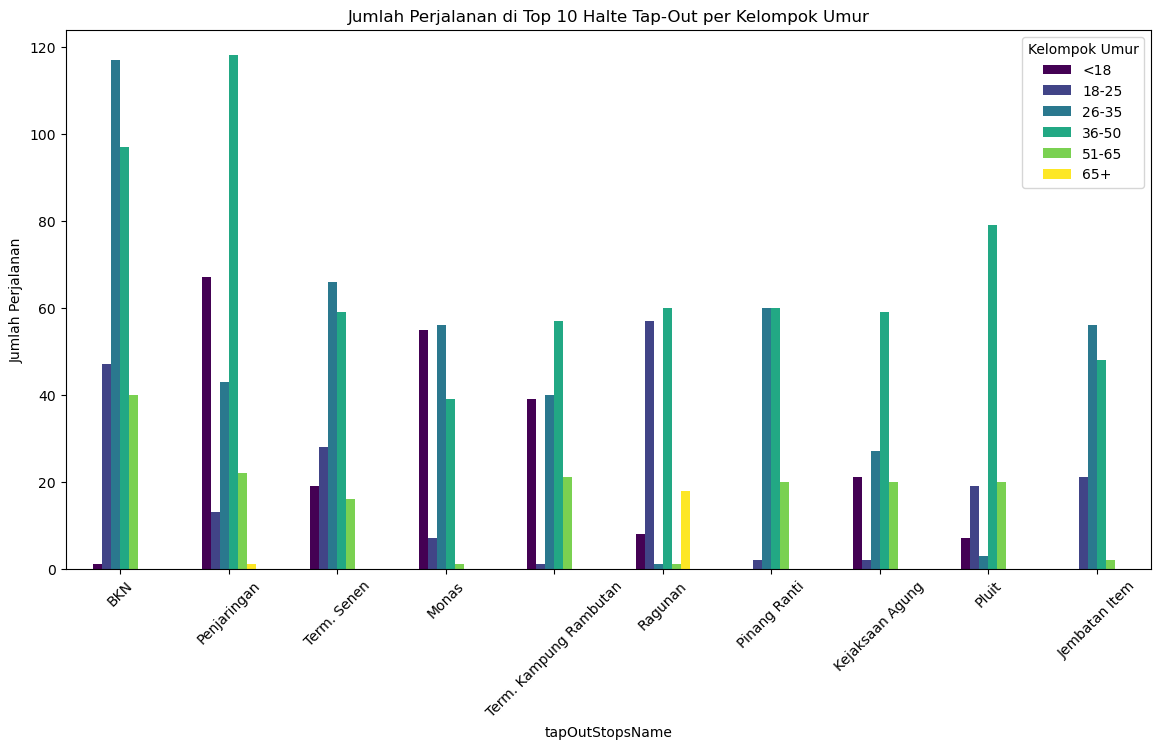

In [377]:
# Calculate the number of trips for the top 10 busiest corridors
top_corridors = df_cleaned['corridorID'].value_counts().head(10).index
df_top_corridors = df_cleaned[df_cleaned['corridorID'].isin(top_corridors)]

# Group data by corridor and age group
trips_per_age_corridor = df_top_corridors.groupby(['corridorID', 'ageGroup']).size().unstack().fillna(0)

# Sort the data by total trips in descending order
trips_per_age_corridor['Total'] = trips_per_age_corridor.sum(axis=1)
trips_per_age_corridor = trips_per_age_corridor.sort_values(by='Total', ascending=False).drop(columns='Total')

# Plotting the combined bar chart for age groups
ax = trips_per_age_corridor.plot(kind='bar', stacked=False, figsize=(14, 7), colormap='viridis')

# Customize the plot
plt.title('Jumlah Perjalanan di Top 10 Koridor per Kelompok Umur')
plt.xlabel('ID Koridor')
plt.ylabel('Jumlah Perjalanan')
plt.legend(title='Kelompok Umur')
plt.xticks(rotation=45)
plt.show()

# Function to plot bar chart for a given stop column
def plot_stop_chart(stop_column, title):
    # Calculate the number of trips for the top 10 busiest stops
    top_stops = df_cleaned[stop_column].value_counts().head(10).index
    df_top_stops = df_cleaned[df_cleaned[stop_column].isin(top_stops)]

    # Group data by stop and age group
    trips_per_age_stop = df_top_stops.groupby([stop_column, 'ageGroup']).size().unstack().fillna(0)

    # Sort the data by total trips in descending order
    trips_per_age_stop['Total'] = trips_per_age_stop.sum(axis=1)
    trips_per_age_stop = trips_per_age_stop.sort_values(by='Total', ascending=False).drop(columns='Total')

    # Plotting the combined bar chart for age groups
    ax = trips_per_age_stop.plot(kind='bar', stacked=False, figsize=(14, 7), colormap='viridis')

    # Customize the plot
    plt.title(title)
    plt.xlabel(f'{stop_column}')
    plt.ylabel('Jumlah Perjalanan')
    plt.legend(title='Kelompok Umur')
    plt.xticks(rotation=45)
    plt.show()

# Plot charts for tap-in stops and tap-out stops
plot_stop_chart('tapInStopsName', 'Jumlah Perjalanan di Top 10 Halte Tap-In per Kelompok Umur')
plot_stop_chart('tapOutStopsName', 'Jumlah Perjalanan di Top 10 Halte Tap-Out per Kelompok Umur')

**Observations:**

Age Distribution in Top 10 Corridors:
* The bar chart shows the distribution of trips by different age groups within the top 10 corridors.
* There are variations in age distribution across different corridors, with some corridors having higher usage by specific age groups.
* The corridors '1T' and 'S21' have a significant number of trips across various age groups, especially '26-35' and '36-50'.

Age Distribution in Top 10 Tap-In Stops:
* The bar chart displays the number of trips by different age groups for the top 10 tap-in stops.
* Some stops, like 'Penjaringan' and 'Garuda Taman Mini', show higher usage by the '26-35' and '36-50' age groups.
* Other stops, such as 'BKN' and 'BNN LRT', also show a balanced distribution among the '18-25', '26-35', and '36-50' age groups.

Age Distribution in Top 10 Tap-Out Stops:
* The bar chart shows the distribution of trips by different age groups at the top 10 tap-out stops.
* Stops like 'BKN' and 'Penjaringan' have high usage across multiple age groups, especially '26-35' and '36-50'.
* Other stops, such as 'Monas' and 'Term. Kampung Rambutan', also have significant usage by the '18-25' and '26-35' age groups.

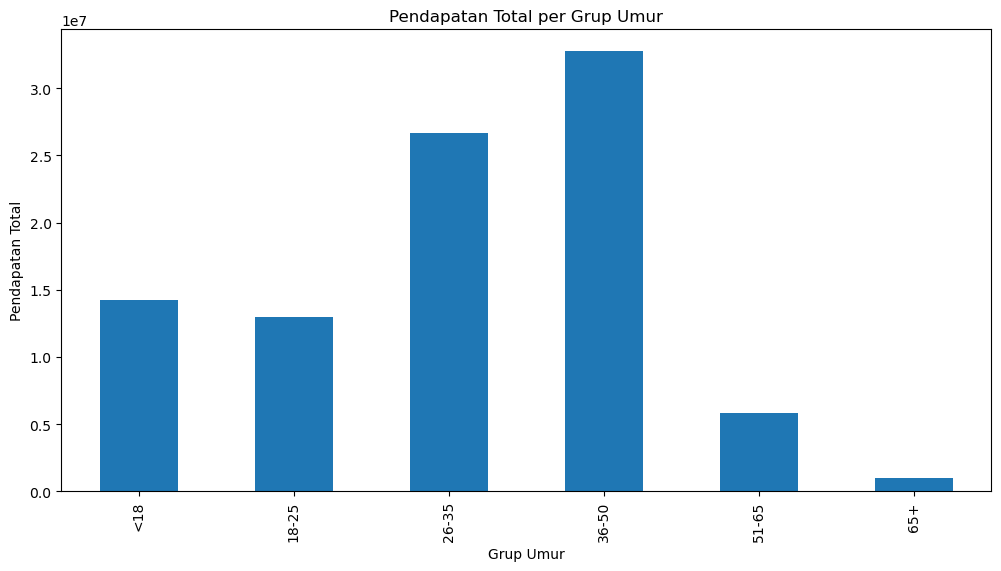

In [378]:
# Calculate total revenue per age group
total_revenue_per_age_group = df_cleaned.groupby('ageGroup')['payAmount'].sum()

# Plot bar chart for total revenue per age group
plt.figure(figsize=(12, 6))
total_revenue_per_age_group.plot(kind='bar', title='Pendapatan Total per Grup Umur')
plt.xlabel('Grup Umur')
plt.ylabel('Pendapatan Total')
plt.show()


**Observations:**

Total Revenue Distribution:
* The bar chart shows the total revenue generated by each age group.
* The '36-50' age group generates the highest revenue, followed by the '26-35' age group.
* These age groups typically consist of working professionals who commute regularly. They likely use public transportation frequently for daily commutes, resulting in higher revenue generation.
* The '51-65' and '65+' age groups contribute the least to the total revenue.

In [379]:
# Prepare data for ANOVA test
age_groups = df_cleaned['ageGroup'].unique()
revenue_data = [df_cleaned[df_cleaned['ageGroup'] == age_group]['payAmount'] for age_group in age_groups]

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(*revenue_data)

print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean total revenue among different age groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean total revenue among different age groups.")

F-Statistic: 62.1727192836911
P-Value: 9.14522754315856e-65
Reject the null hypothesis: There is a significant difference in the mean total revenue among different age groups.


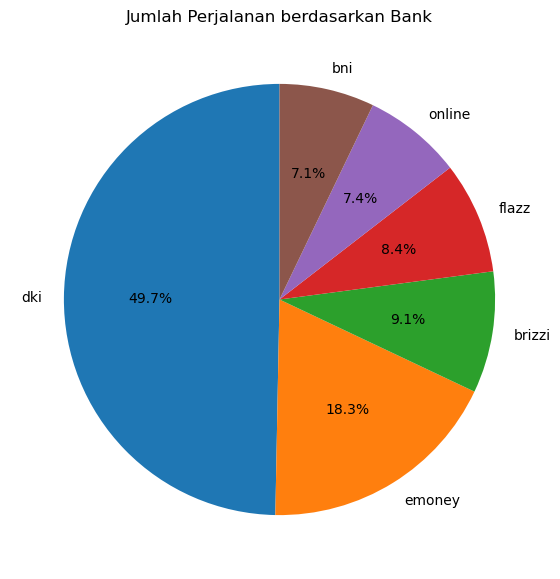

In [380]:
# Calculate the number of trips by bank
trips_per_bank = df_cleaned['payCardBank'].value_counts()

# Plot pie chart for the number of trips by bank
plt.figure(figsize=(14, 7))
trips_per_bank.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Jumlah Perjalanan berdasarkan Bank')
plt.ylabel('')
plt.show()


**Observations:**

Distribution of Trips by Bank:
* The pie chart shows the distribution of trips based on the bank associated with the pay cards used for transactions.
* A few banks dominate the majority of trips, indicating a higher preference or market share among TransJakarta users.
* Some banks have a smaller share of trips, suggesting less frequent usage or a smaller customer base among TransJakarta passengers.

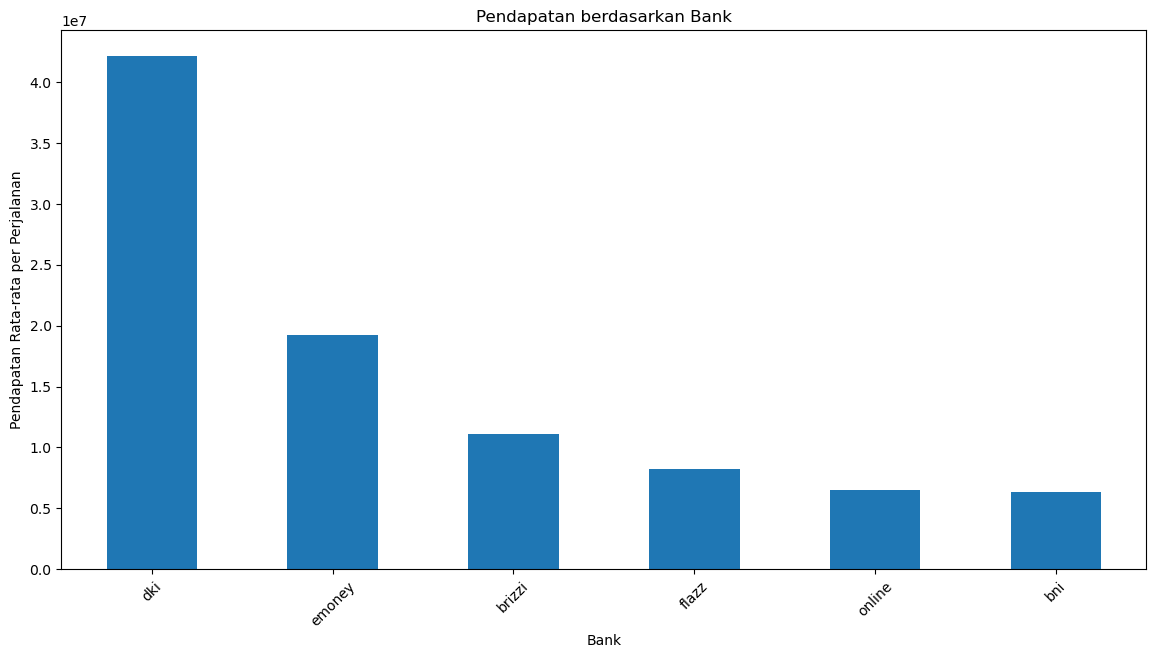

In [381]:
# Calculate average revenue per trip by bank
revenue_per_trip_bank = df_cleaned.groupby('payCardBank')['payAmount'].sum().sort_values(ascending=False)

# Plot bar chart for average revenue per trip by bank
plt.figure(figsize=(14, 7))
revenue_per_trip_bank.plot(kind='bar')
plt.title('Pendapatan berdasarkan Bank')
plt.xlabel('Bank')
plt.ylabel('Pendapatan Rata-rata per Perjalanan')
plt.xticks(rotation=45)
plt.show()


**Observations:**

Distribution of Revenue by Bank:
* The bar chart shows the total revenue generated by each bank, sorted in descending order.
* The bank 'dki' generates the highest revenue, followed by 'emoney'.
* Other banks such as 'brizzi', 'flazz', 'ontine', and 'bni' contribute significantly less to the total revenue.
* The top revenue banks may have a larger customer base using TransJakarta services or offer incentives that encourage more frequent use, such as lower transaction fees or rewards.

**Key Insights:**

* `Customer Experience`: Providing gender-specific amenities or addressing issues that affect one gender more than the other can lead to increased satisfaction and loyalty among passengers. For example, ensuring safety measures for female passengers can enhance their travel experience. Also, ensuring that the payment process is seamless and efficient for users of high-revenue banks can enhance the overall customer experience. Conducting surveys and gathering feedback from passengers using high-revenue banks can help identify areas for improvement.
* `Targeted Services`: Consider developing targeted services or promotions for the '0-18',  '51-65', and '65+' age groups to increase ridership. This could include discounts and concessions for students and senior citizens. Also, further look into why the mode of transactions are low for bottom banks.
* `Service Expansion`: Consider expanding services or adding new routes that connect areas with a high concentration of the '36-50' and '26-35' age groups. Ideally, this will be new routes that can connect to more commercial districts for workplaces and schools locations.
* `Marketing and Promotions`: Highlighting the benefits and convenience of using TransJakarta to university students and professionals can drive higher ridership and revenue.
* `Partnership Opportunities`: Collaborating with high-revenue banks for joint promotions and service enhancements can drive higher ridership and revenue. Also, Transjakarta may be able to upcharge and be more precise on selling their adspace by making use of the male-female and age group demographics.

In [382]:
# Convert data types
df_cleaned['transID'] = df_cleaned['transID'].astype('string')
df_cleaned['payCardID'] = df_cleaned['payCardID'].astype('string')
df_cleaned['payCardBank'] = df_cleaned['payCardBank'].astype('string')
df_cleaned['payCardName'] = df_cleaned['payCardName'].astype('string')
df_cleaned['payCardSex'] = df_cleaned['payCardSex'].astype('string')
df_cleaned['payCardBirthDate'] = df_cleaned['payCardBirthDate'].astype('int64')
df_cleaned['corridorID'] = df_cleaned['corridorID'].astype('string')
df_cleaned['corridorName'] = df_cleaned['corridorName'].astype('string')
df_cleaned['direction'] = df_cleaned['direction'].astype('int64')
df_cleaned['tapInStops'] = df_cleaned['tapInStops'].astype('string')
df_cleaned['tapInStopsName'] = df_cleaned['tapInStopsName'].astype('string')
df_cleaned['tapInStopsLat'] = df_cleaned['tapInStopsLat'].astype('float64')
df_cleaned['tapInStopsLon'] = df_cleaned['tapInStopsLon'].astype('float64')
df_cleaned['stopStartSeq'] = df_cleaned['stopStartSeq'].astype('int64')
df_cleaned['tapInTime'] = pd.to_datetime(df['tapInTime'])
df_cleaned['tapOutTime'] = pd.to_datetime(df['tapOutTime'])
df_cleaned['tapOutStops'] = df['tapOutStops'].astype('string')
df_cleaned['tapOutStopsName'] = df_cleaned['tapOutStopsName'].astype('string')
df_cleaned['tapOutStopsLat'] = df_cleaned['tapOutStopsLat'].astype('float64')
df_cleaned['tapOutStopsLon'] = df_cleaned['tapOutStopsLon'].astype('float64')

# Verify data types
print(df_cleaned.dtypes)

transID             string[python]
payCardID           string[python]
payCardBank         string[python]
payCardName         string[python]
payCardSex          string[python]
payCardBirthDate    int64         
corridorID          string[python]
corridorName        string[python]
direction           int64         
tapInStops          string[python]
tapInStopsName      string[python]
tapInStopsLat       float64       
tapInStopsLon       float64       
stopStartSeq        int64         
tapInTime           datetime64[ns]
tapOutStops         string[python]
tapOutStopsName     string[python]
tapOutStopsLat      float64       
tapOutStopsLon      float64       
stopEndSeq          float64       
tapOutTime          datetime64[ns]
payAmount           float64       
day_of_week         int32         
tapInHour           int32         
date                object        
is_weekend          bool          
is_peak_hour        int64         
tripDuration        float64       
age                 

In [383]:
# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('Cleaned_Transjakarta.csv', index=False)

# Conclusion and Recommendation

**Conclusion:**
* The analysis of peak hours has revealed clear patterns of increased usage during specific times of the day (5-9 AM and 4-9 PM) on weekdays. This indicates a high demand for TransJakarta services during these peak hour periods, likely due to commuters traveling to and from work and/or school.
* The top 10 busiest corridors have been identified which are 1T and S21 as the top 2, showing significant variations in usage. Some corridors have a higher concentration of trips and revenue during peak hours. Additionally, there are corridors with high trip frequency but lower revenue, indicating varying ticket prices or passenger load.
* The analysis of tap-in and tap-out data has identified the top busiest stops such as Penjaringan, BKN, Garuda Taman Mini, and BNN LRT revealing significant differences in usage patterns. The busiest stops for tap-ins and tap-outs vary, indicating different passenger behaviors and travel patterns.
* The demographic analysis has revealed significant insights into the gender, age group, and payment preferences of TransJakarta passengers. Gender trip dsitribution is predominantly female overall, and the '26-35' and '36-50' age groups are the primary users and highest revenue contributors. For banks and payment, dki dominate the majority of trips and revenue contributions.

**Recommendation:**
1. `Optimize Bus Fleet and Corridors`: Increase the frequency of buses during peak hours to accommodate the higher demand. This can help reduce wait times and overcrowding, improving passenger satisfaction. Management can divert the fleets from the least busy corridors to help service busy corridors during peak hours. Focus on enhancing services in the busiest corridors. Increasing the frequency and reliability of buses in these corridors can help manage the high demand especially during peak times. Management should also try to decrease bus frequency for the bottom corridors in order to save on fixed fuel costs, this way management can boost up the average operating margin. 
2. `Deploy Additional Staff`: Allocate more staff during peak hours to manage the increased passenger flow efficiently. Ensuring that buses are running on time and at full capacity can help meet the high demand.
3. `Real-Time Monitoring`: Implement real-time monitoring systems to track passenger load and adjust bus schedules dynamically based on demand. This can help in making timely adjustments to services as needed.
4. `Dynamic Pricing Strategies`: vary ticket prices based on corridors and during peak hours to optimize and maximize revenue. Management can also decrease ticket prices for least busy corridors to encourage potential customers to ride Transjakarta. Alternatively, if more studies can be done, it may also be wise to do the opposite instead and increase the ticket price for the least busy corridors since this will help prop up the operating margin per bus because most of the operating cost will be fuel cost which is a fixed cost regardless of how many passengers are on board in the bus.
5. `Enhance Services at Busy Stops`: Focus on improving facilities and services at the top 10 busiest stops. This can include adding more shelters, seating, and real-time information displays to help make the customer experience more pleasant.
6. `Additional Revenue Streams`: Explore opportunities for additional revenue streams at busy stops, such as installing vending machines, express cafes, retail kiosks, and upcharge ad spaces at these busy stops.
7. `Passenger Flow Management`: Implement measures to manage passenger flow efficiently at busy stops. This can include dedicated lanes for boarding and alighting, and improved signage to guide passengers. A smooth passenger flow will help to improve the customer experience and the would increase customer loyalty.
8. `Tailored Services & Marketing`: Customize services to meet the needs of different demographic groups. For example, providing gender-specific amenities at women dominated bus stops or promotions for different age groups that can enhance satisfaction. Develop marketing strategies that target specific demographics based on their usage patterns. Highlighting the benefits and convenience of using TransJakarta to different age groups and genders can drive higher ridership.
9. `Strategic Partnerships`: Collaborate with most actively used banks for joint promotions and service enhancements. This can help attract more passengers and increase revenue.